In [1]:
import pandas as pd
import scanpy as sc
import anndata
import graph_tool.all as gt
import pickle

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/all.py:40: RuntimeWarning: Error importing draw module, proceeding nevertheless: /usr/lib/python3/dist-packages/cairo/_cairo.cpython-37m-x86_64-linux-gnu.so: undefined symbol: cairo_tee_surface_index
  warnings.warn(msg, RuntimeWarning)


In [18]:
%matplotlib inline
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
g = pickle.load( open( "adata_10x/10x_graph_g.pkl", "rb" ) ) 

In [4]:
states_100=[]
for i in range (100):
    i=gt.minimize_nested_blockmodel_dl(g, deg_corr=False)
    states_100.append(i)

In [6]:
pickle.dump(states_100, open('adata_10x/10x_100_states.pkl','wb'), 2)

In [3]:
states_100=pickle.load(open('adata_10x/10x_100_states.pkl','rb'))

In [4]:
states_100

[<NestedBlockState object, with base <BlockState object with 67 blocks (67 nonempty), for graph <Graph object, undirected, with 860 vertices and 5976 edges at 0x7f728dfa48d0>, at 0x7f7272e5a390>, and 5 levels of sizes [(860, 67), (67, 14), (14, 5), (5, 2), (2, 1)] at 0x7f724888c110>,
 <NestedBlockState object, with base <BlockState object with 64 blocks (64 nonempty), for graph <Graph object, undirected, with 860 vertices and 5976 edges at 0x7f728dfa48d0>, at 0x7f7272df6510>, and 5 levels of sizes [(860, 64), (64, 14), (14, 4), (4, 2), (2, 1)] at 0x7f724888c550>,
 <NestedBlockState object, with base <BlockState object with 60 blocks (60 nonempty), for graph <Graph object, undirected, with 860 vertices and 5976 edges at 0x7f728dfa48d0>, at 0x7f7272dfef90>, and 5 levels of sizes [(860, 60), (60, 14), (14, 4), (4, 2), (2, 1)] at 0x7f7272df6d10>,
 <NestedBlockState object, with base <BlockState object with 70 blocks (70 nonempty), for graph <Graph object, undirected, with 860 vertices and 

In [8]:
states_100[0].print_summary()

l: 0, N: 860, B: 67
l: 1, N: 67, B: 14
l: 2, N: 14, B: 5
l: 3, N: 5, B: 2
l: 4, N: 2, B: 1


In [11]:
max(states_100[0].get_bs()[2])

4

In [11]:
states_100[0]

<NestedBlockState object, with base <BlockState object with 67 blocks (67 nonempty), for graph <Graph object, undirected, with 860 vertices and 5976 edges at 0x7f91e11f4090>, at 0x7f92077dab10>, and 5 levels of sizes [(860, 67), (67, 14), (14, 5), (5, 2), (2, 1)] at 0x7f920783f850>

In [34]:
x=max(states_100[0].get_bs()[2])
x

4

In [5]:
bss=[]
for i in range(100):
    x=max(states_100[i].get_bs()[2])
    bss.append(x)

In [17]:
bss[0:6]

[4, 3, 3, 4, 4, 2]

In [40]:
groups_5=[]
groups_4=[]
groups_3=[]
groups_6=[]
for i in bss:
    if i==4:
        groups_5.append(i)
    elif i==3:
        groups_4.append(i)
    elif i==2:
        groups_3.append(i)
    else:
        groups_6.append(i)
    

In [42]:
len(groups_5)

48

In [43]:
len(groups_4)

49

In [44]:
len(groups_3)

2

In [45]:
len(groups_6)

1

In [ ]:
#

In [6]:
import anndata

In [7]:
adata=sc.read('adata_10x/adata_sc_10x.h5ad')
adata

AnnData object with n_obs × n_vars = 860 × 1596 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [8]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

In [9]:
df_significativo= pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20) #### df con i 20 geni significativi per gruppo

In [10]:
cell_annotation= pd.read_table('../sc_mixology/data/csv/sc_10x_5cl.metadata.csv.gz', compression="gzip", sep=",", index_col=0)

In [11]:
adata.obs.loc[:, "cell_line"] = cell_annotation.loc[adata.obs_names, "cell_line"]
adata.obs.columns

Index(['n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase',
       'leiden', 'cell_line'],
      dtype='object')

<IPython.core.display.Javascript object>


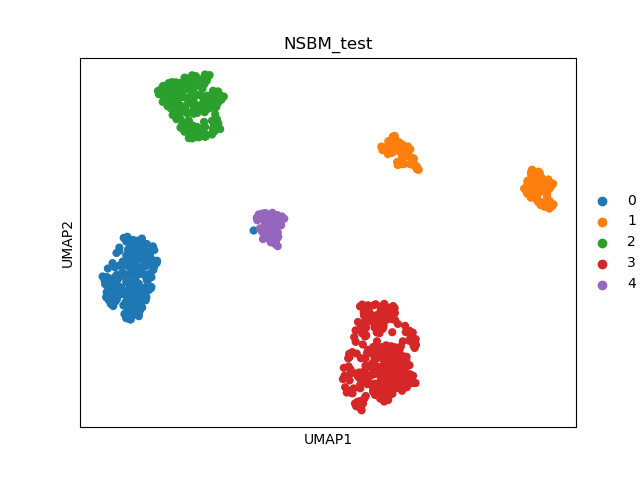

<IPython.core.display.Javascript object>


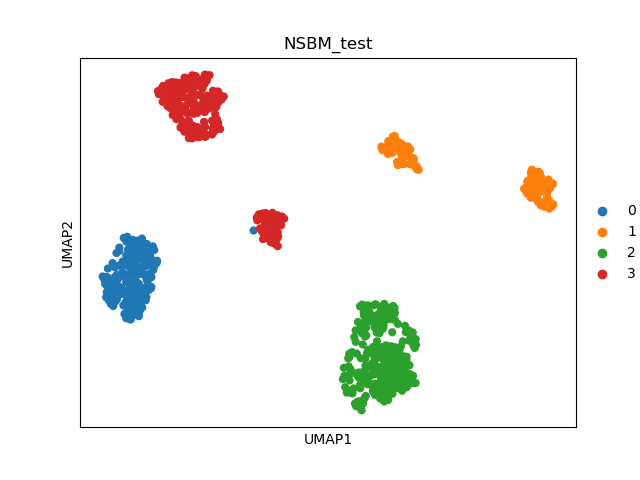

<IPython.core.display.Javascript object>


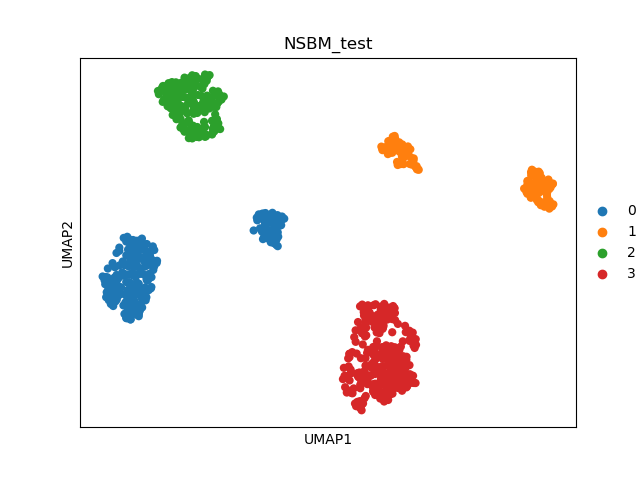

<IPython.core.display.Javascript object>


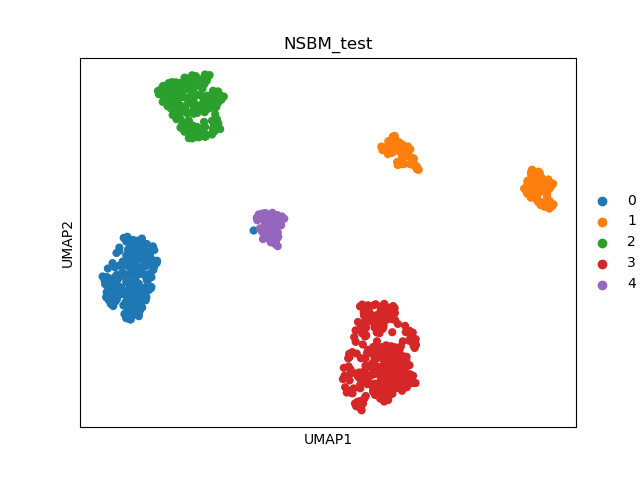

<IPython.core.display.Javascript object>


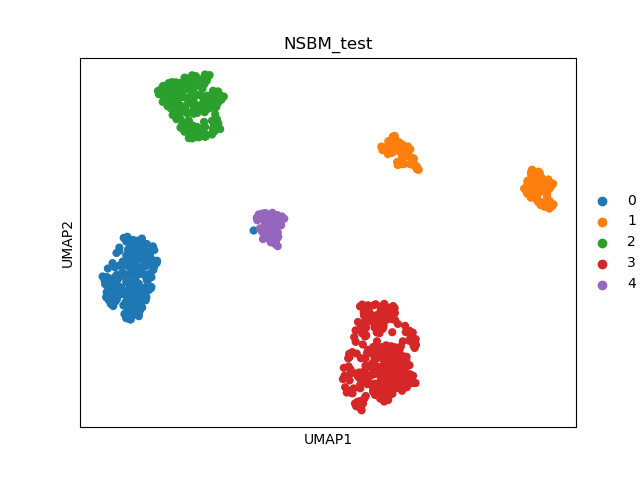

<IPython.core.display.Javascript object>


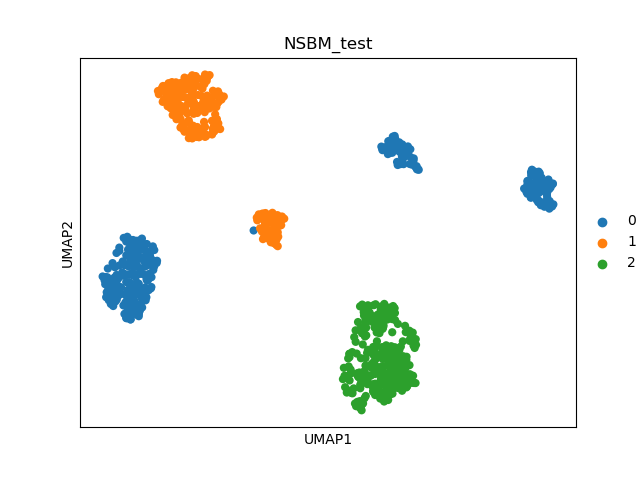

<IPython.core.display.Javascript object>


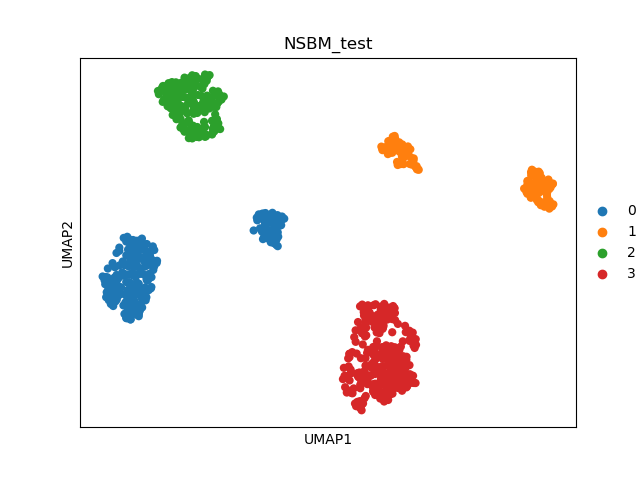

<IPython.core.display.Javascript object>


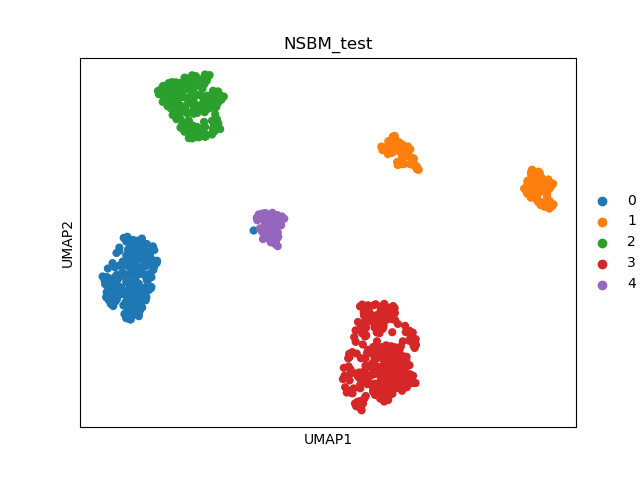

<IPython.core.display.Javascript object>


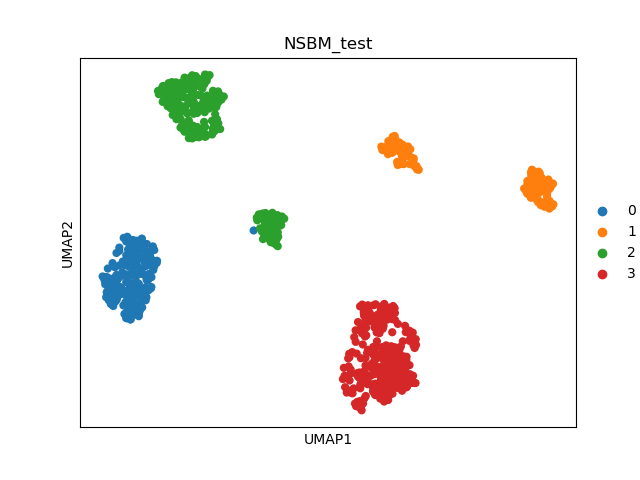

<IPython.core.display.Javascript object>


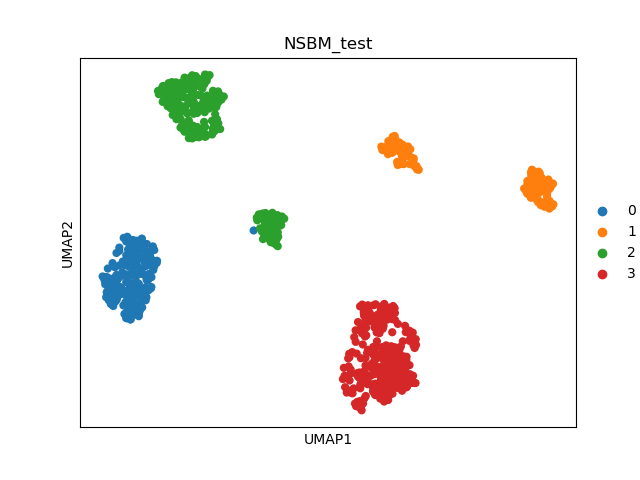

<IPython.core.display.Javascript object>


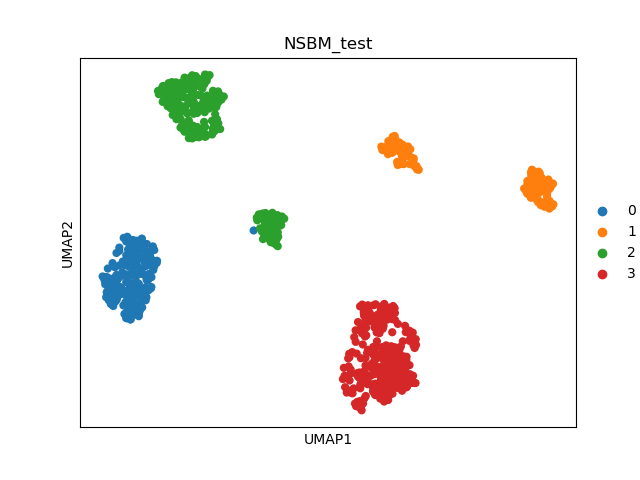

<IPython.core.display.Javascript object>


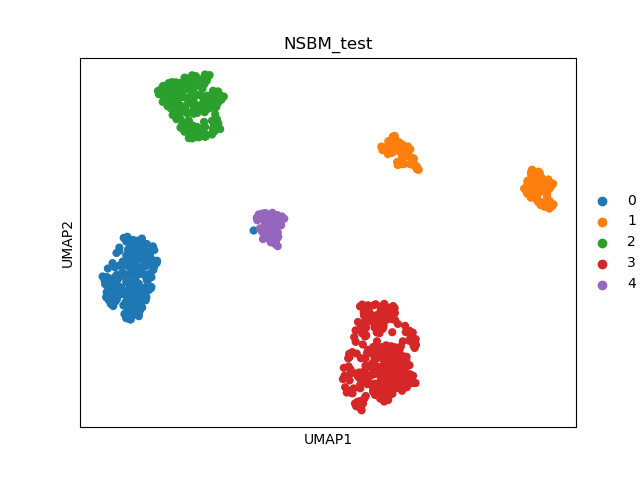

<IPython.core.display.Javascript object>


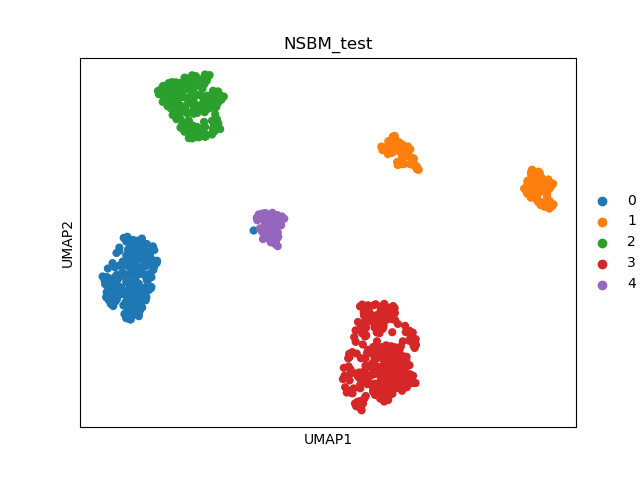

<IPython.core.display.Javascript object>


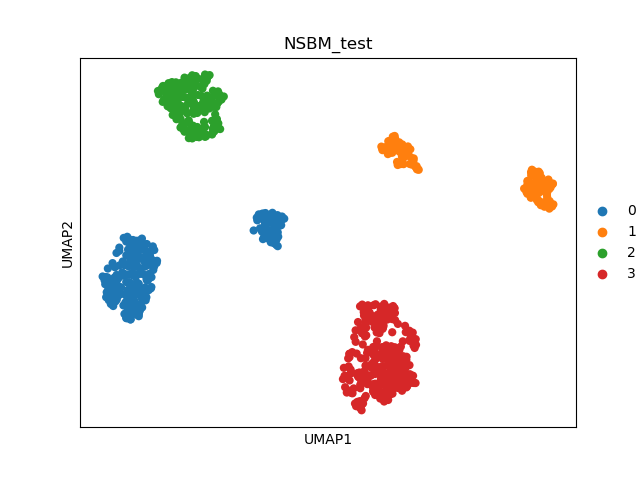

<IPython.core.display.Javascript object>


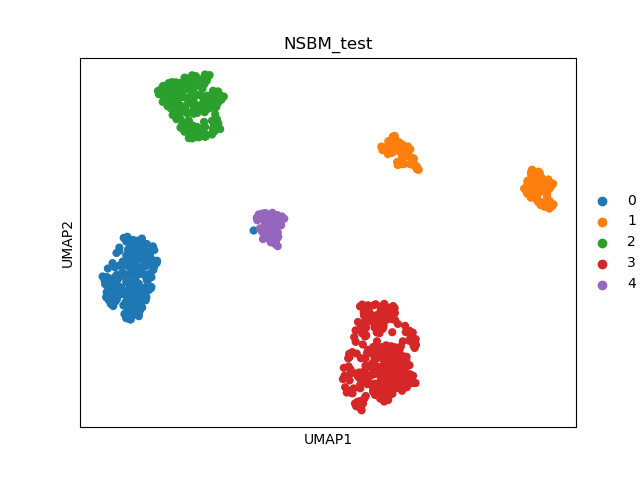

<IPython.core.display.Javascript object>


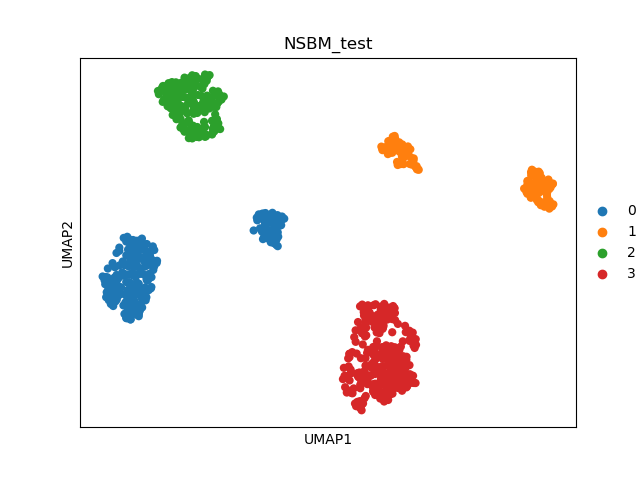

<IPython.core.display.Javascript object>


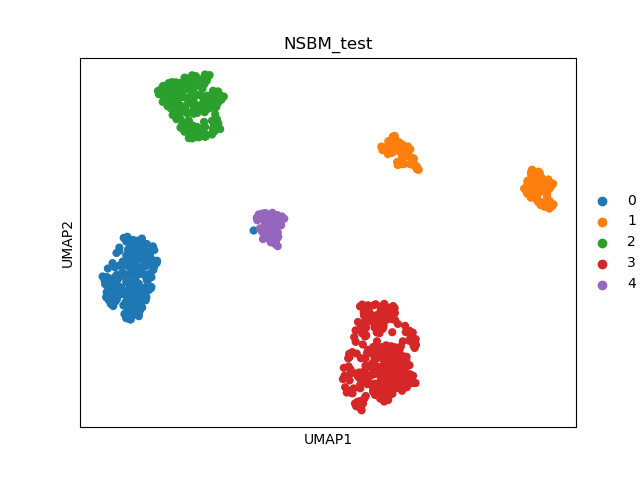

<IPython.core.display.Javascript object>


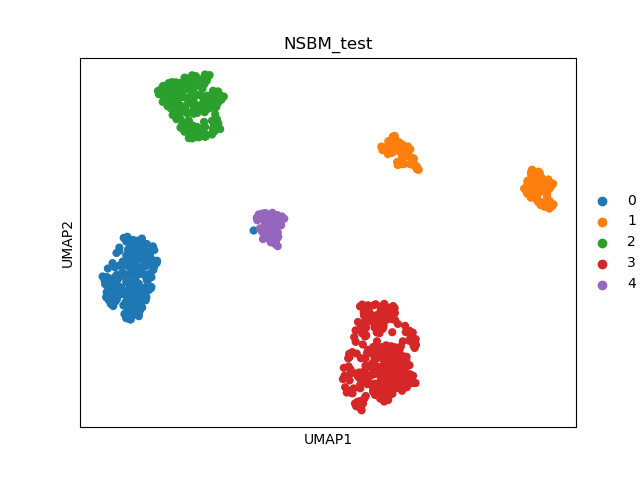

<IPython.core.display.Javascript object>


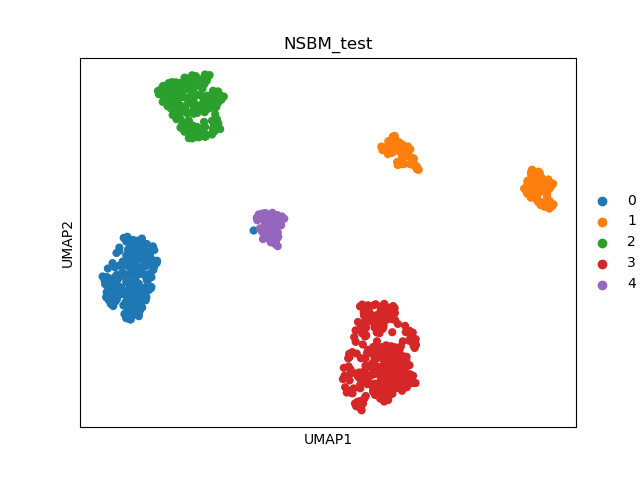

<IPython.core.display.Javascript object>


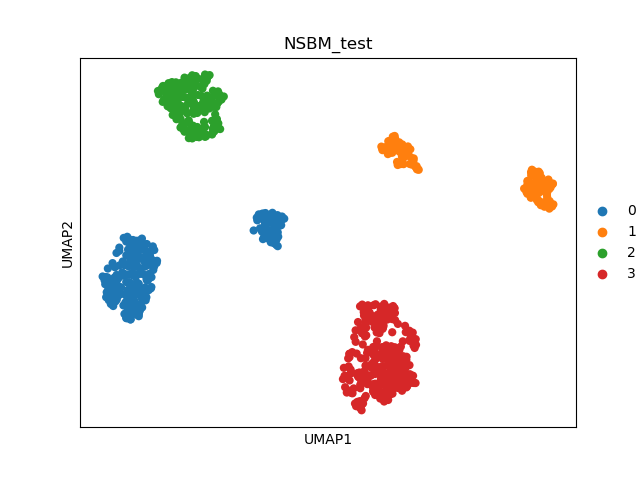

<IPython.core.display.Javascript object>


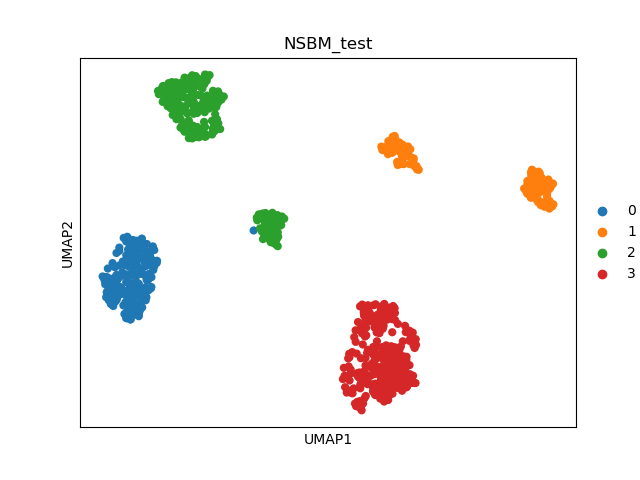

<IPython.core.display.Javascript object>


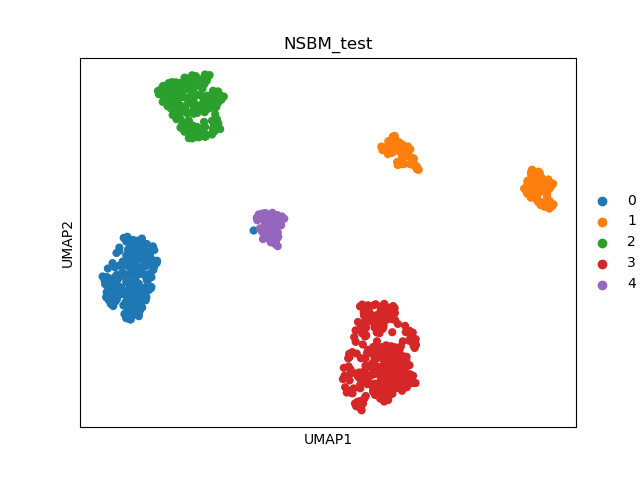

<IPython.core.display.Javascript object>


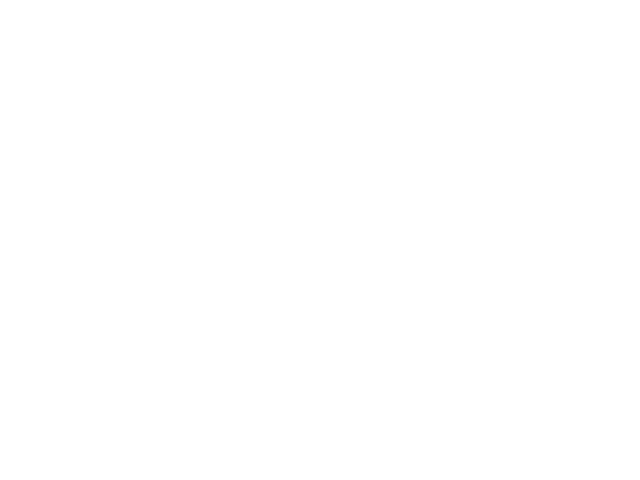

<IPython.core.display.Javascript object>


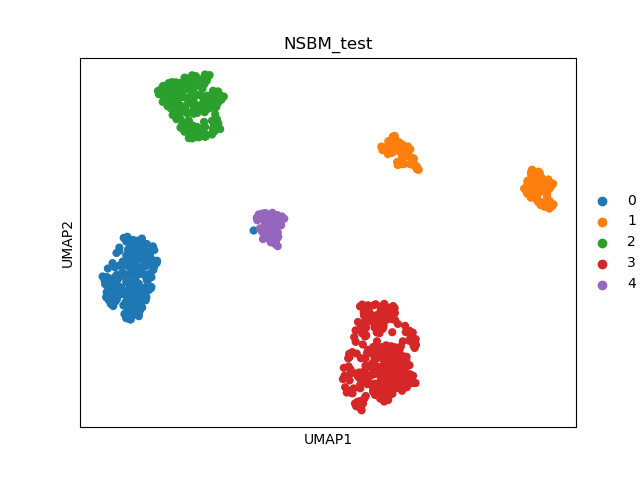

<IPython.core.display.Javascript object>


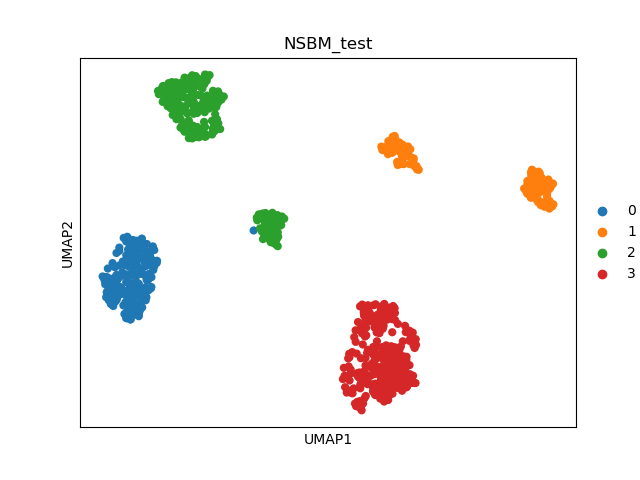

<IPython.core.display.Javascript object>


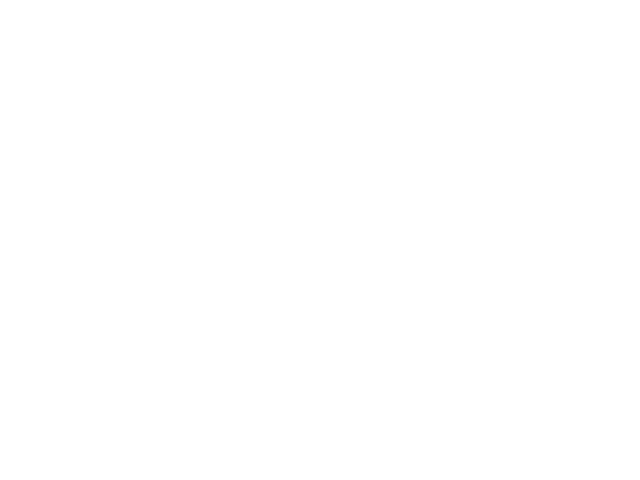

<IPython.core.display.Javascript object>


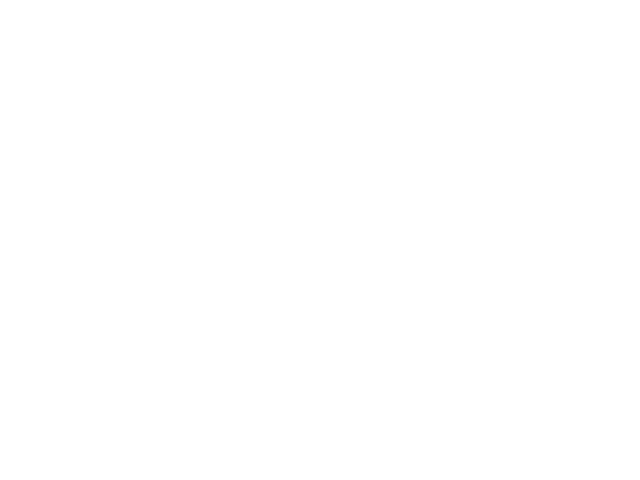

<IPython.core.display.Javascript object>


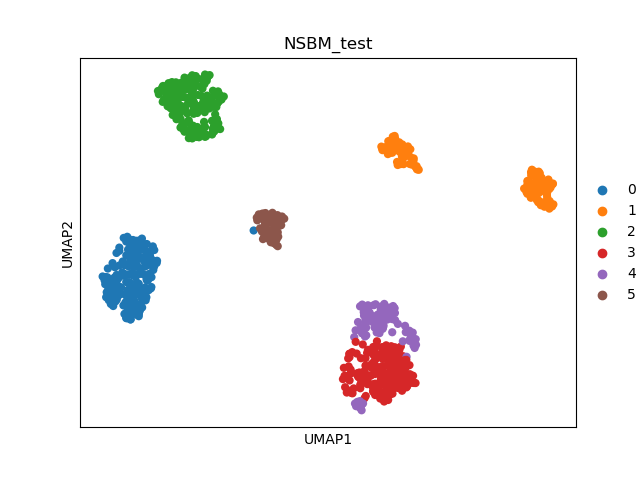

<IPython.core.display.Javascript object>


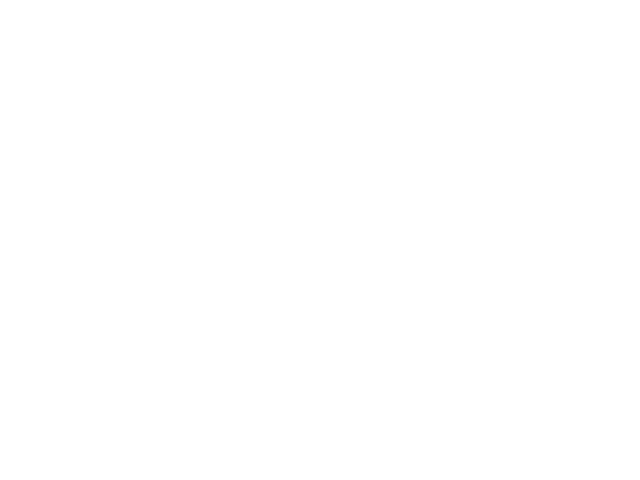

<IPython.core.display.Javascript object>


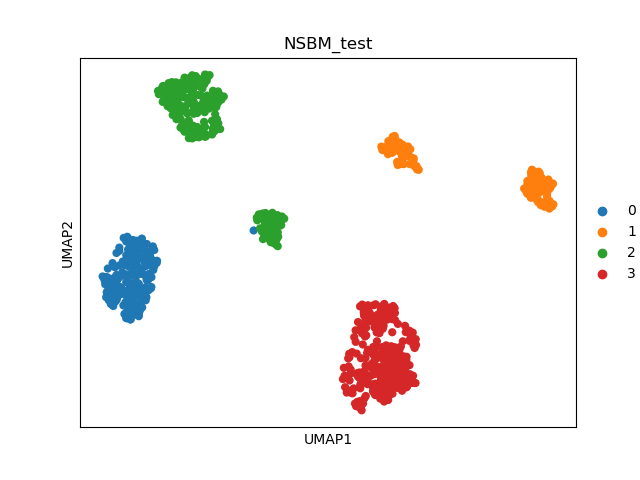

<IPython.core.display.Javascript object>


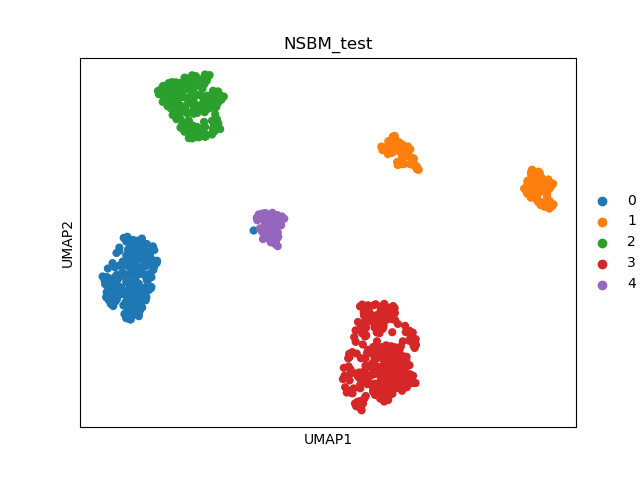

<IPython.core.display.Javascript object>


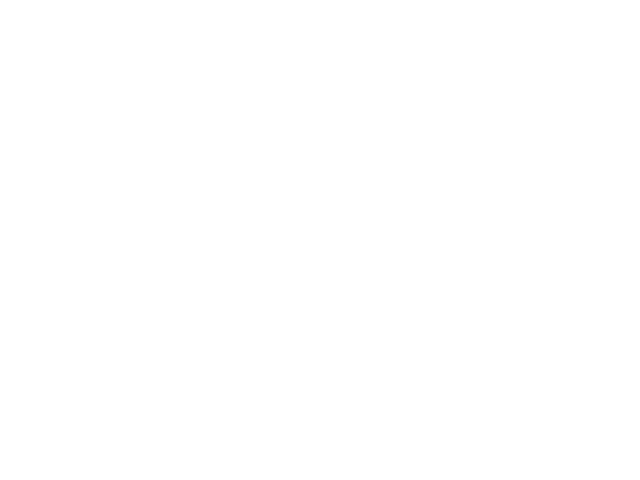

<IPython.core.display.Javascript object>


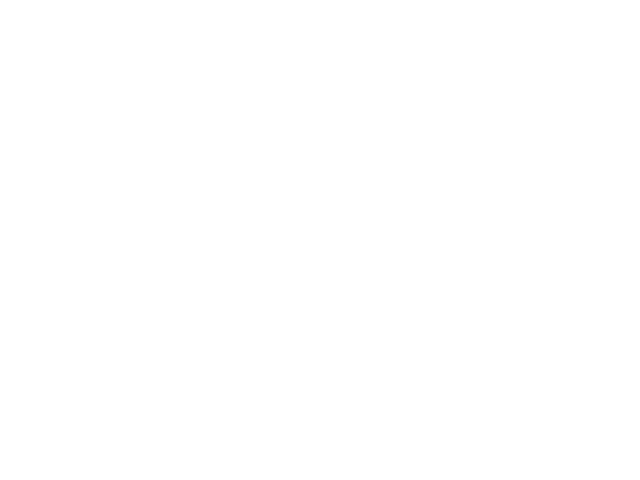

<IPython.core.display.Javascript object>


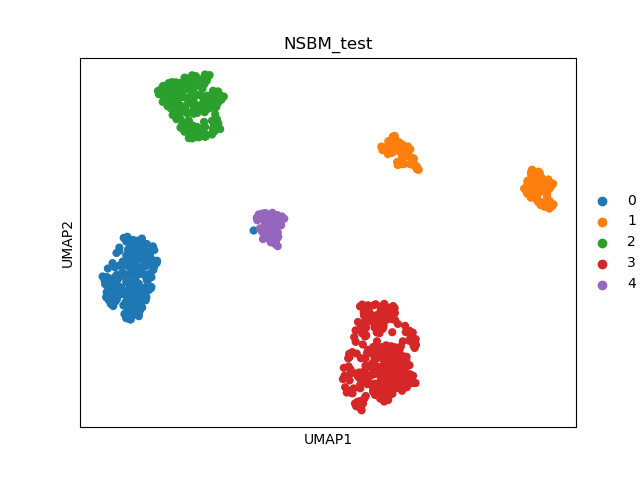

<IPython.core.display.Javascript object>


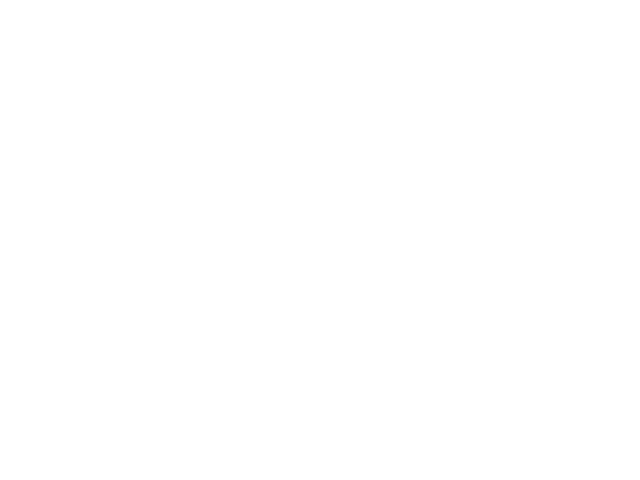

<IPython.core.display.Javascript object>


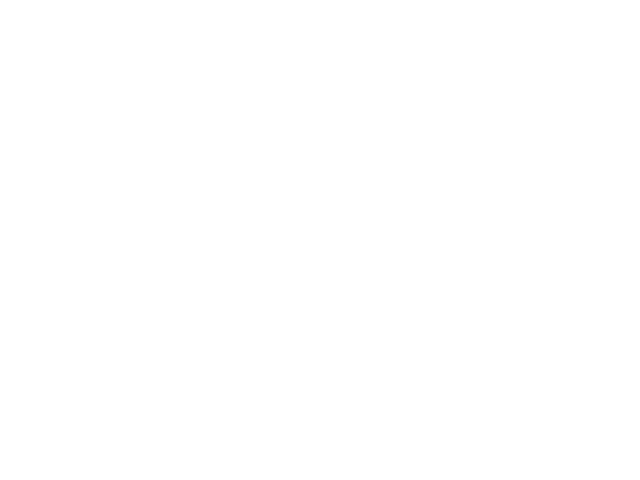

<IPython.core.display.Javascript object>


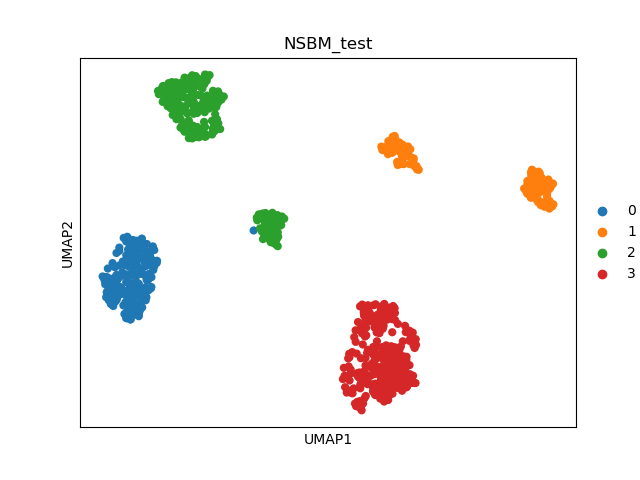

<IPython.core.display.Javascript object>


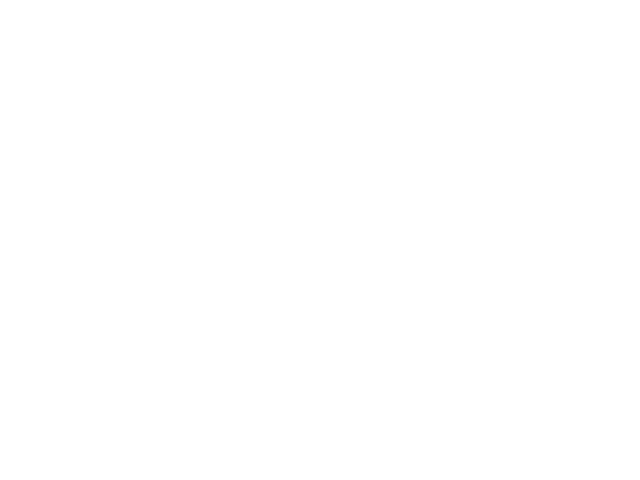

<IPython.core.display.Javascript object>


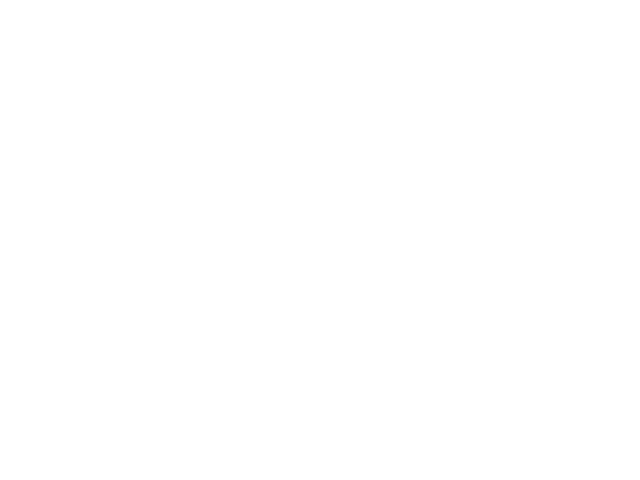

<IPython.core.display.Javascript object>


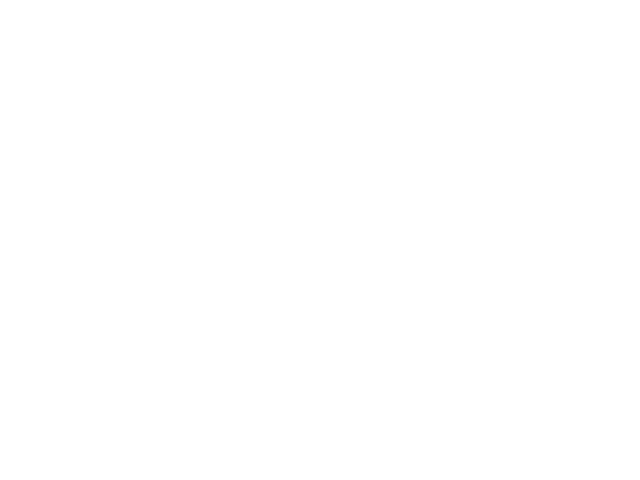

<IPython.core.display.Javascript object>


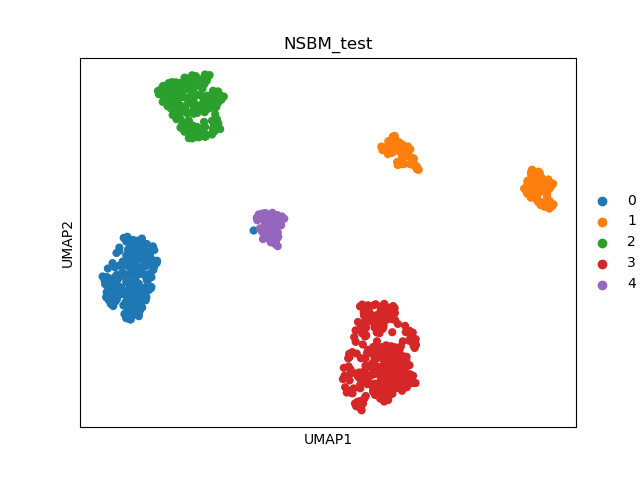

<IPython.core.display.Javascript object>


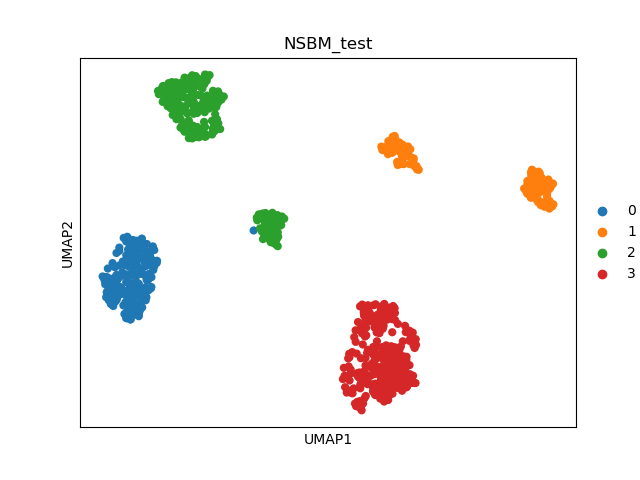

<IPython.core.display.Javascript object>


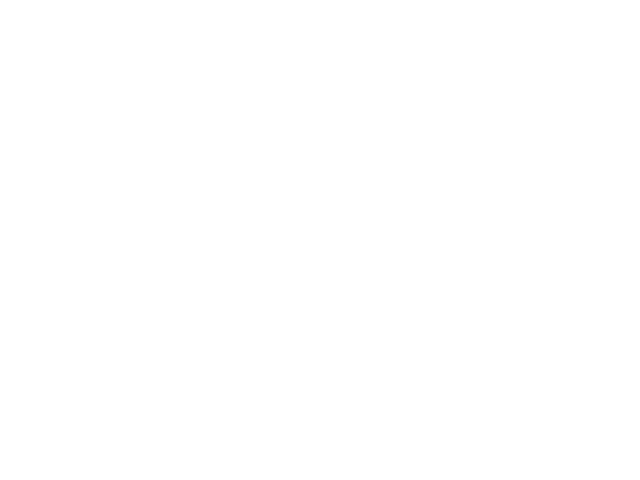

<IPython.core.display.Javascript object>


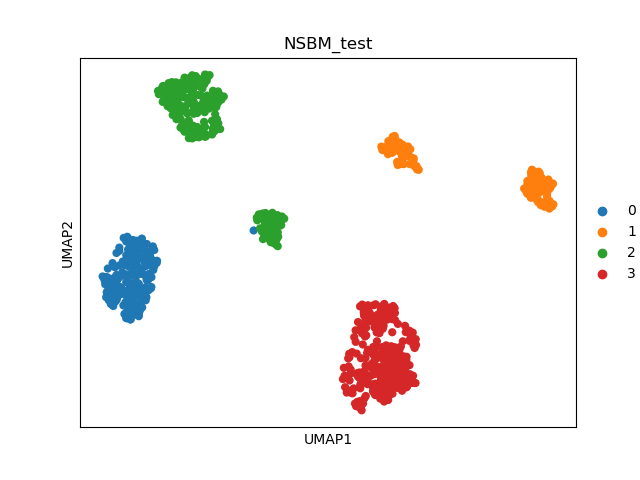

<IPython.core.display.Javascript object>


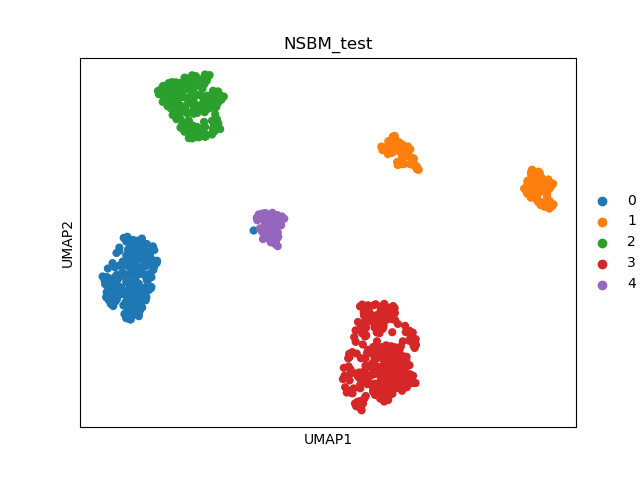

<IPython.core.display.Javascript object>


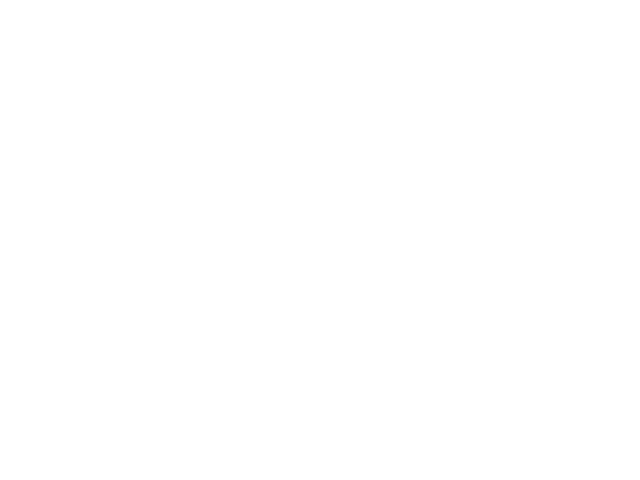

<IPython.core.display.Javascript object>


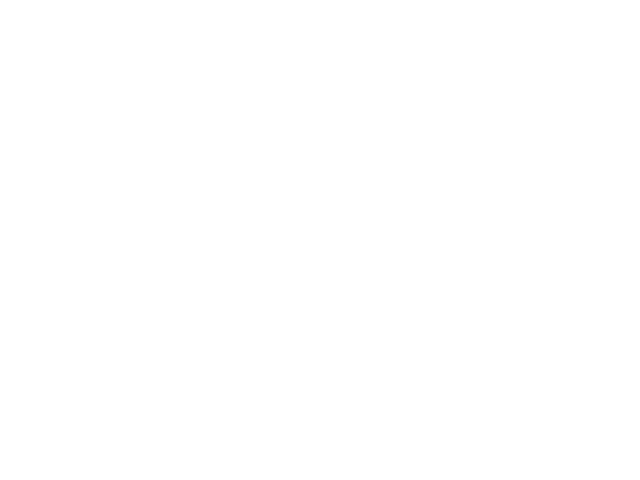

<IPython.core.display.Javascript object>


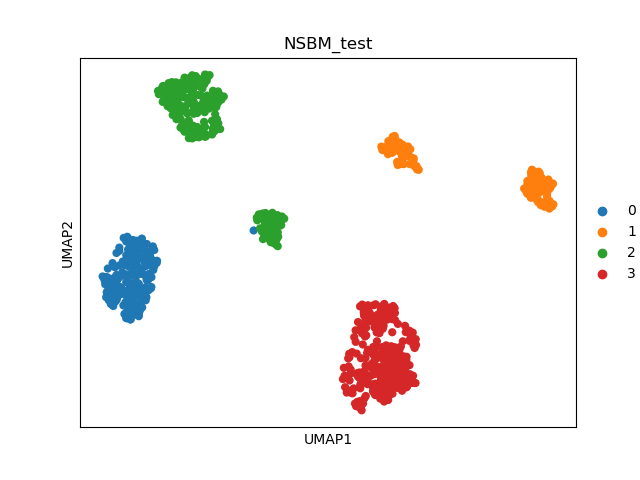

<IPython.core.display.Javascript object>


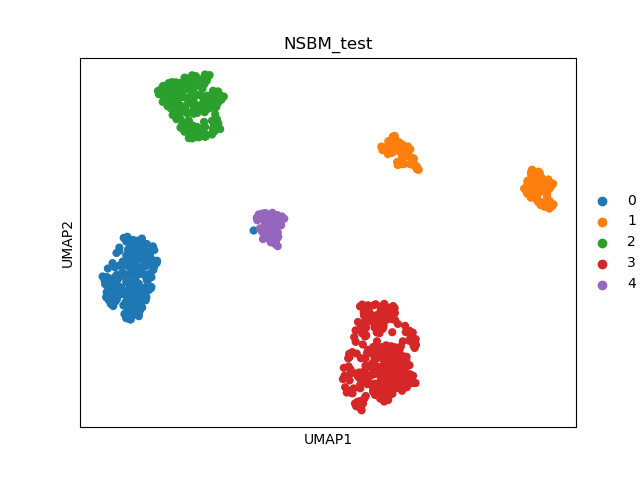

<IPython.core.display.Javascript object>


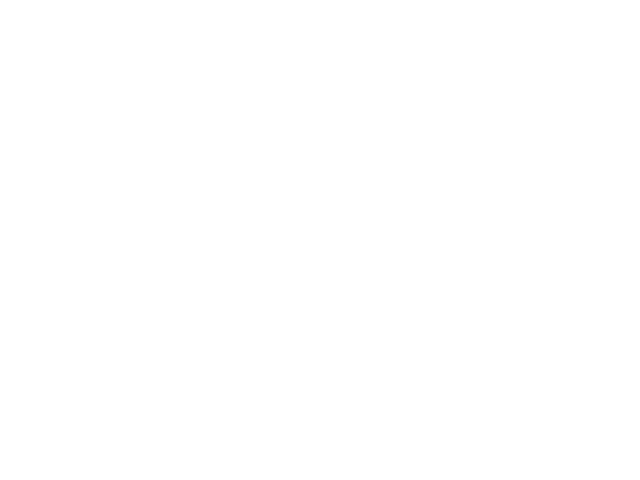

<IPython.core.display.Javascript object>


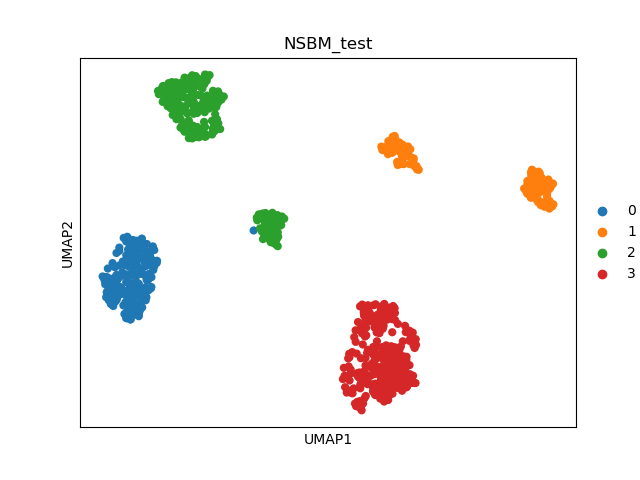

<IPython.core.display.Javascript object>


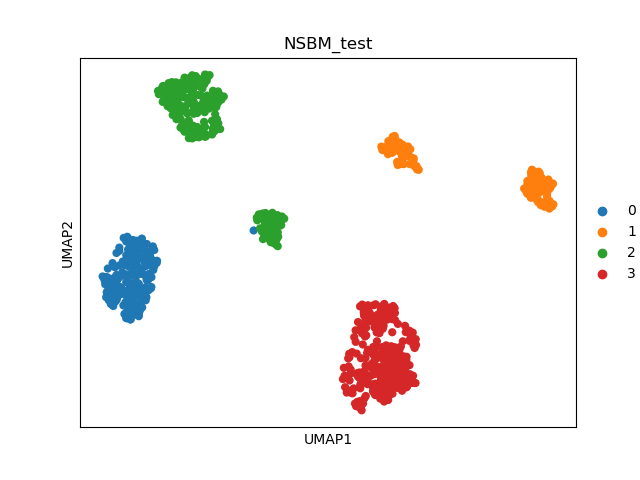

<IPython.core.display.Javascript object>


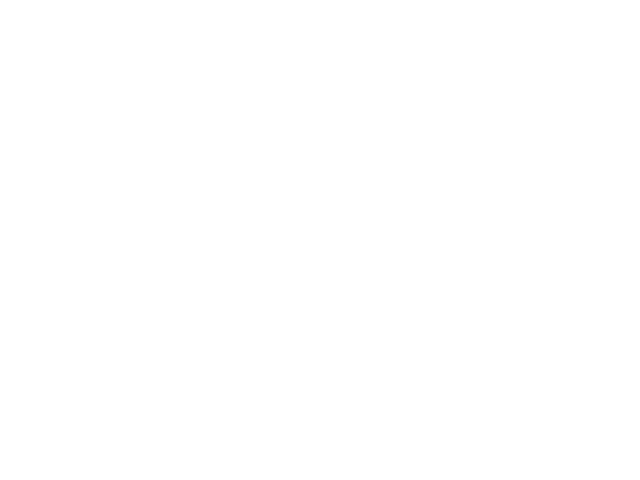

<IPython.core.display.Javascript object>


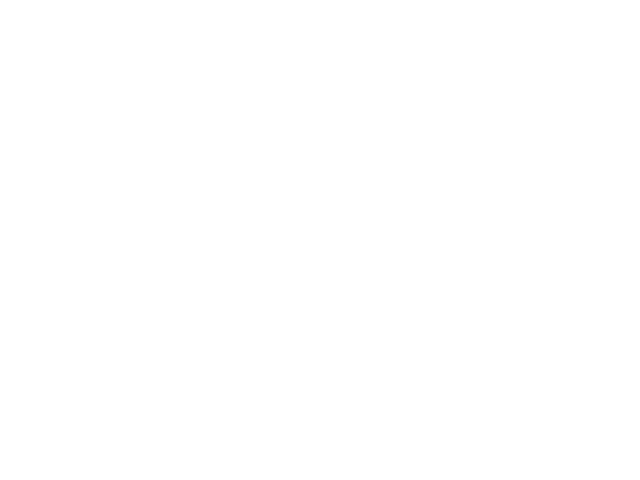

<IPython.core.display.Javascript object>


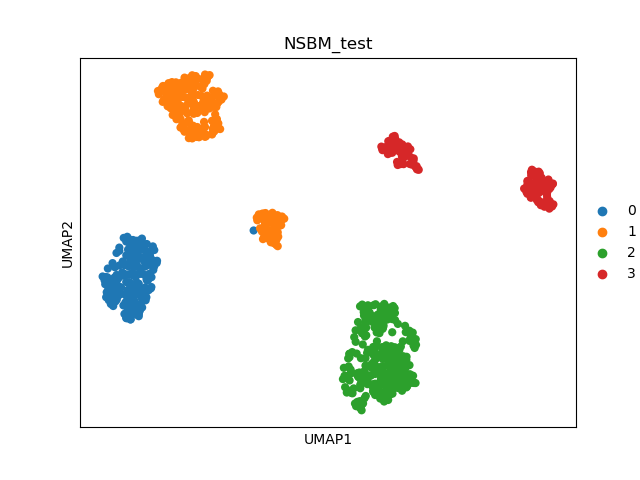

<IPython.core.display.Javascript object>


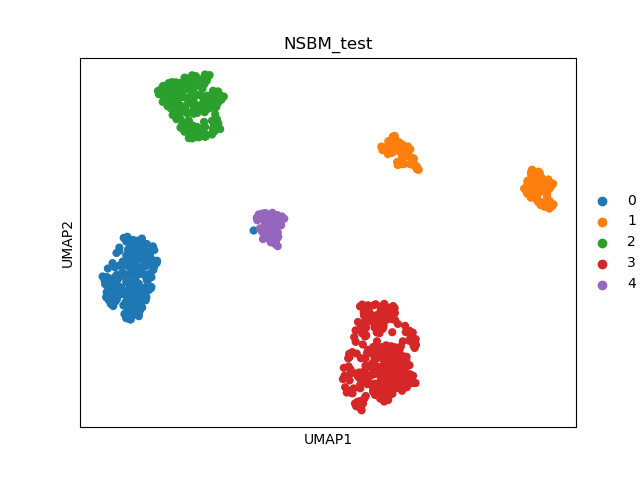

<IPython.core.display.Javascript object>


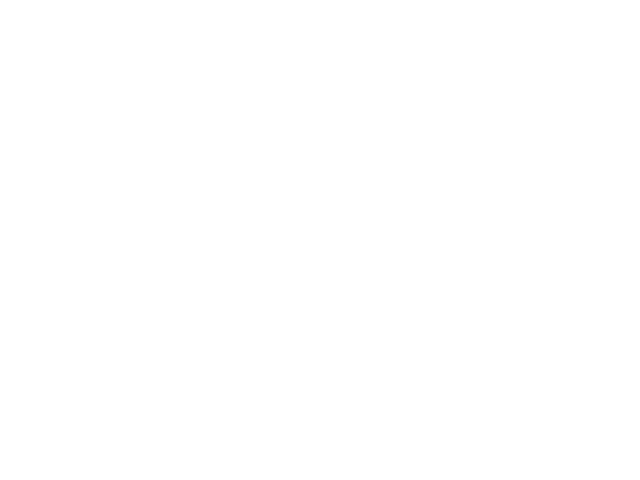

<IPython.core.display.Javascript object>


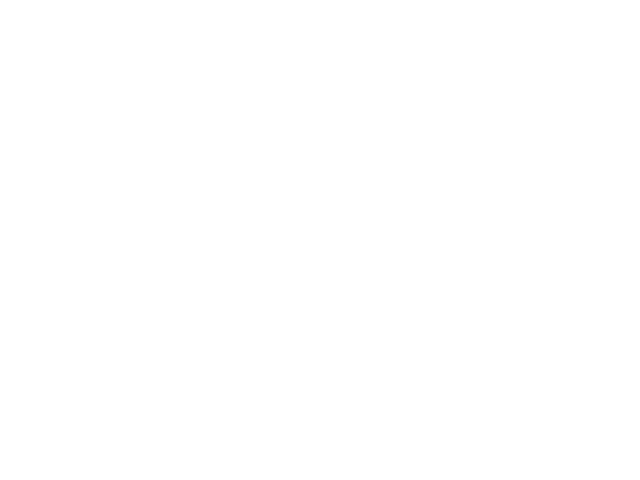

<IPython.core.display.Javascript object>


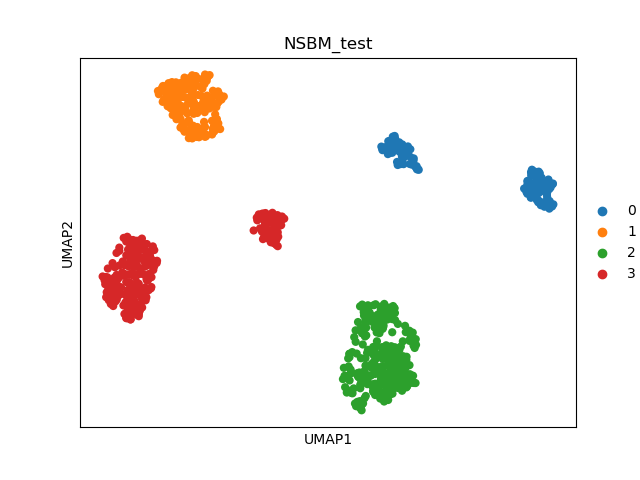

<IPython.core.display.Javascript object>


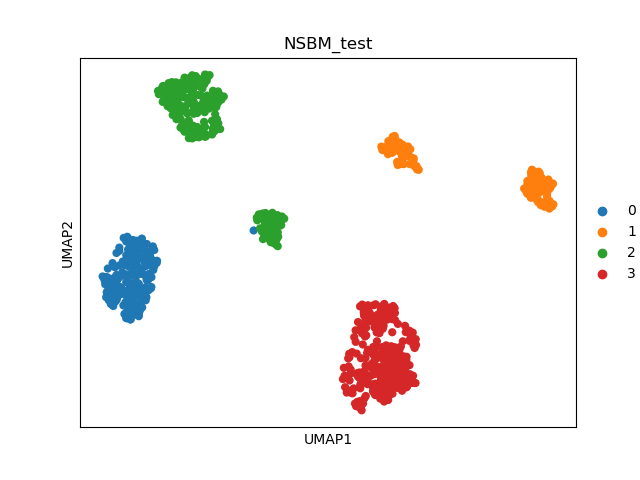

<IPython.core.display.Javascript object>


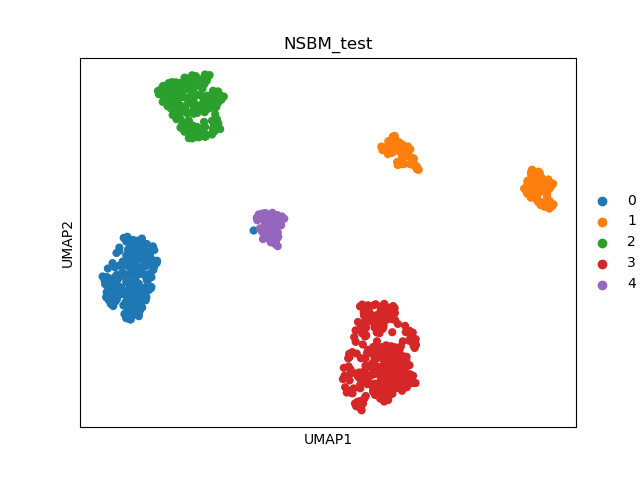

<IPython.core.display.Javascript object>


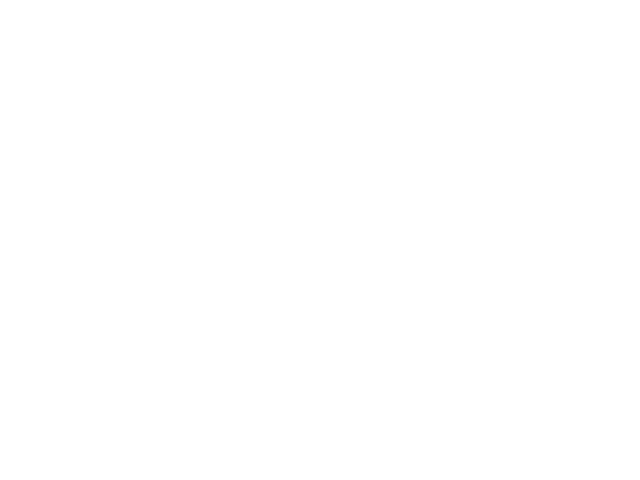

<IPython.core.display.Javascript object>


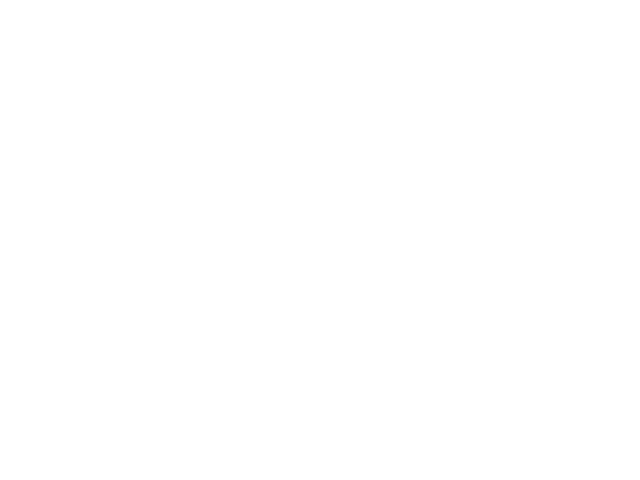

<IPython.core.display.Javascript object>


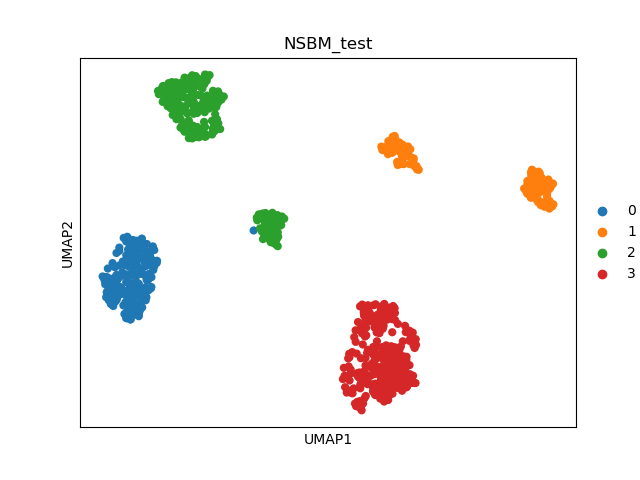

<IPython.core.display.Javascript object>


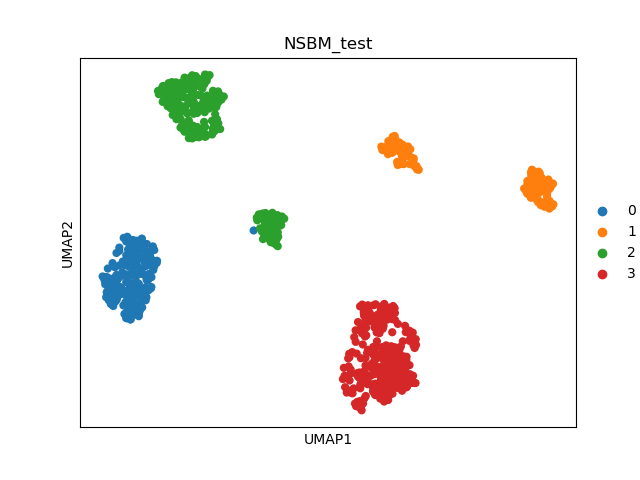

<IPython.core.display.Javascript object>


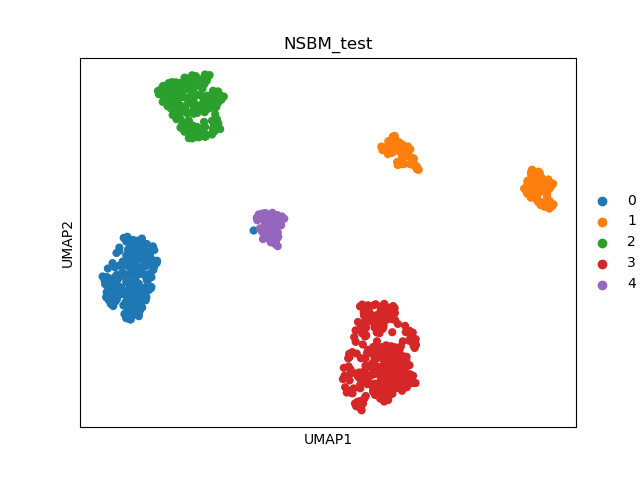

<IPython.core.display.Javascript object>


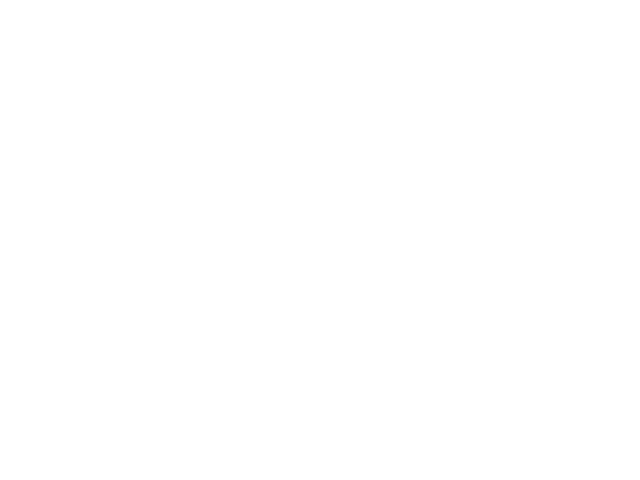

<IPython.core.display.Javascript object>


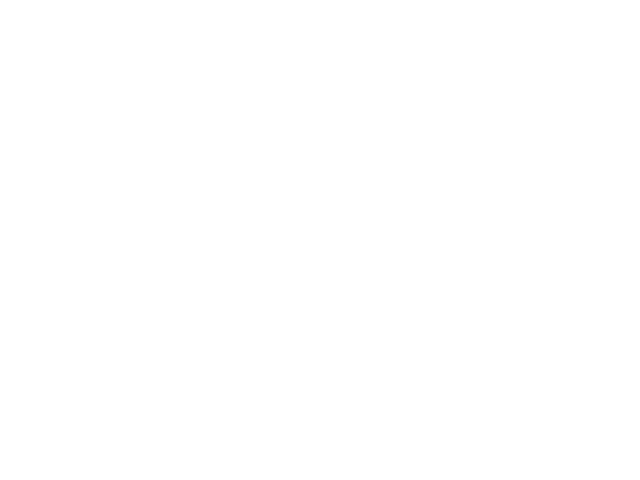

<IPython.core.display.Javascript object>


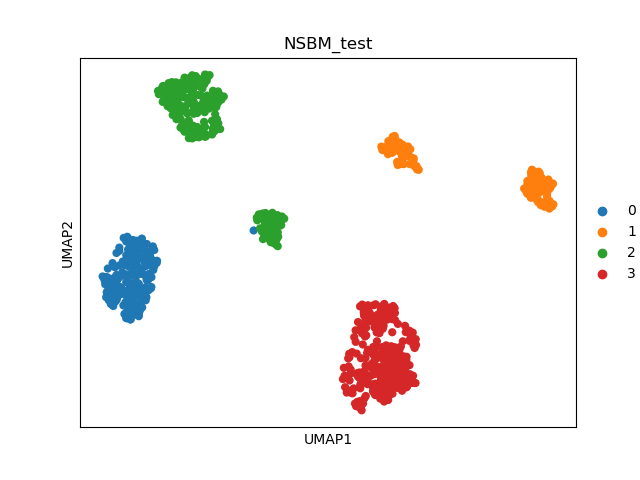

<IPython.core.display.Javascript object>


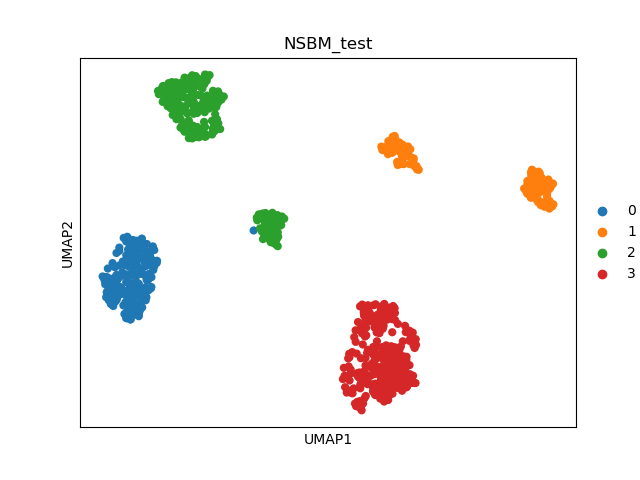

<IPython.core.display.Javascript object>


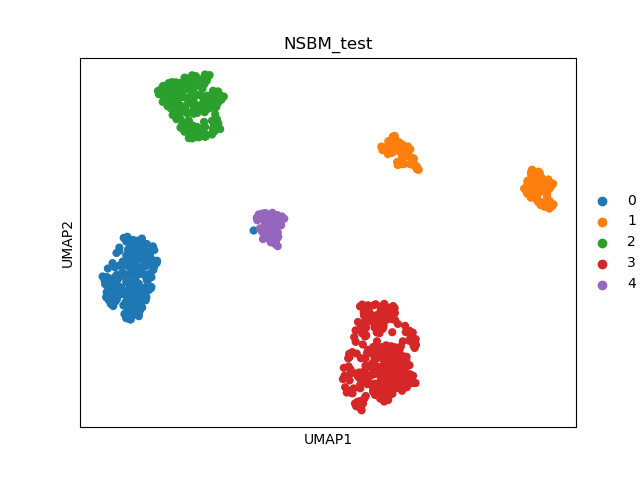

<IPython.core.display.Javascript object>


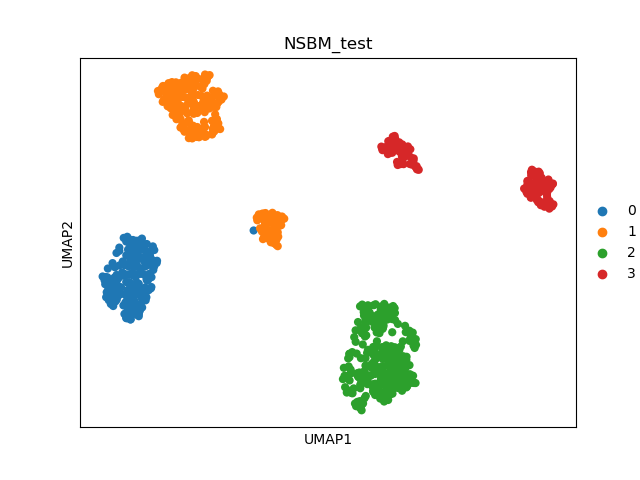

<IPython.core.display.Javascript object>


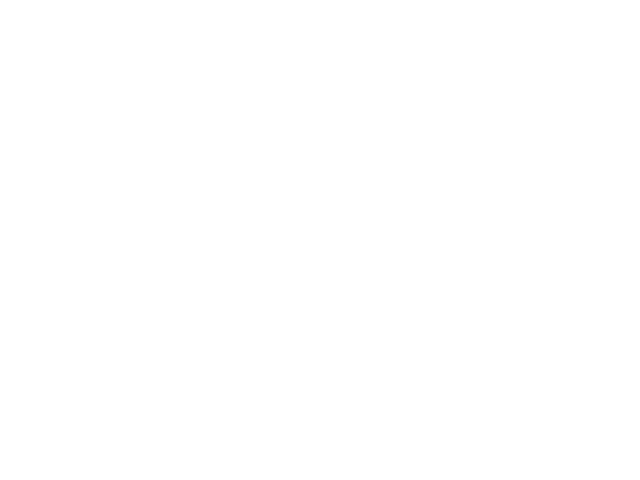

<IPython.core.display.Javascript object>


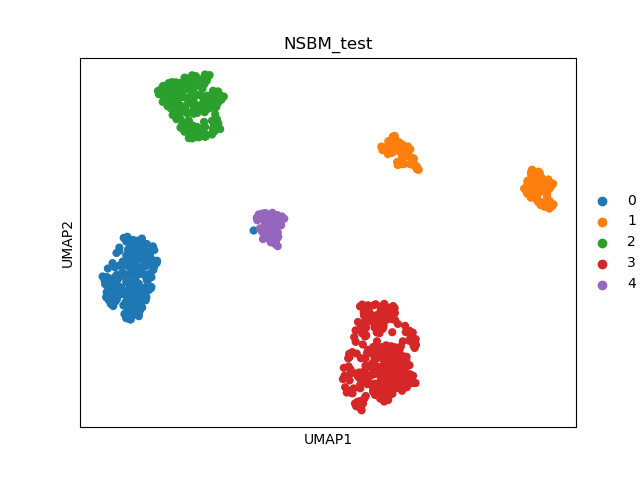

<IPython.core.display.Javascript object>


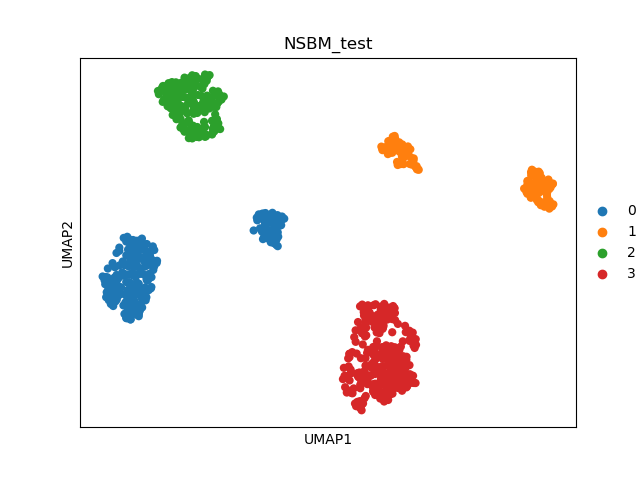

<IPython.core.display.Javascript object>


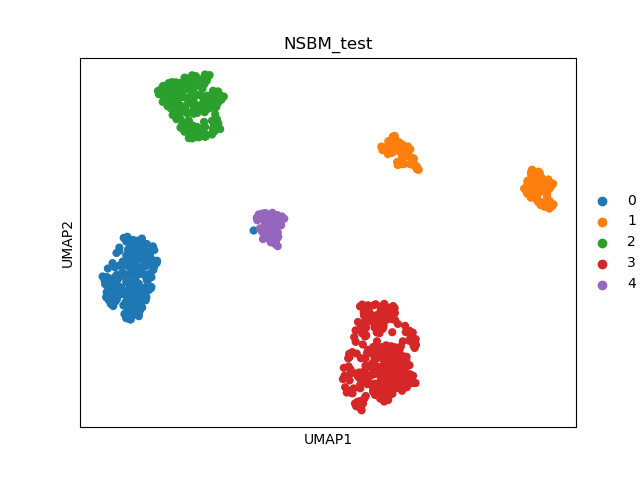

<IPython.core.display.Javascript object>


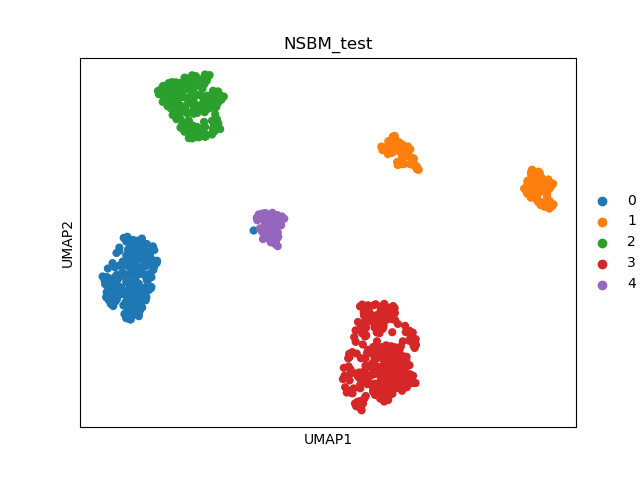

<IPython.core.display.Javascript object>


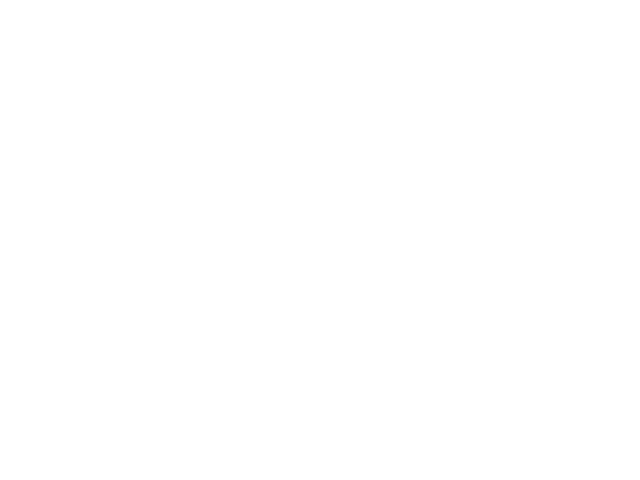

<IPython.core.display.Javascript object>


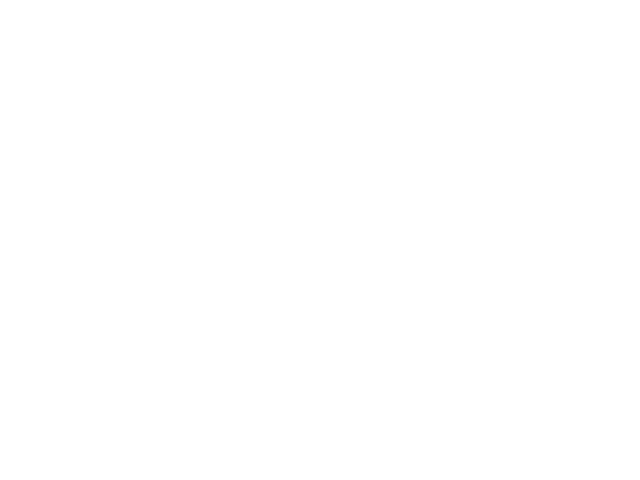

<IPython.core.display.Javascript object>


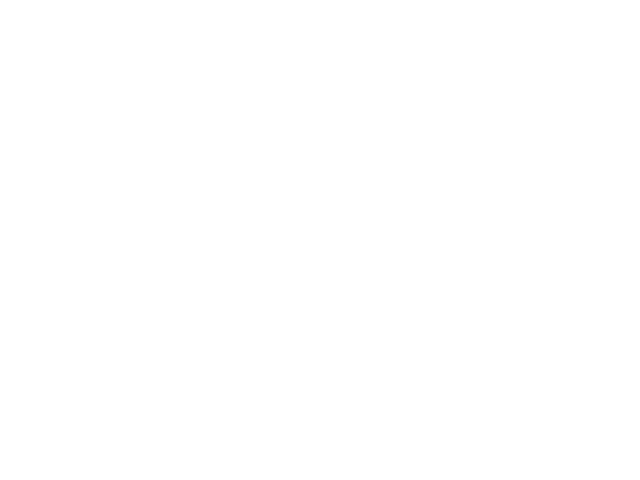

<IPython.core.display.Javascript object>


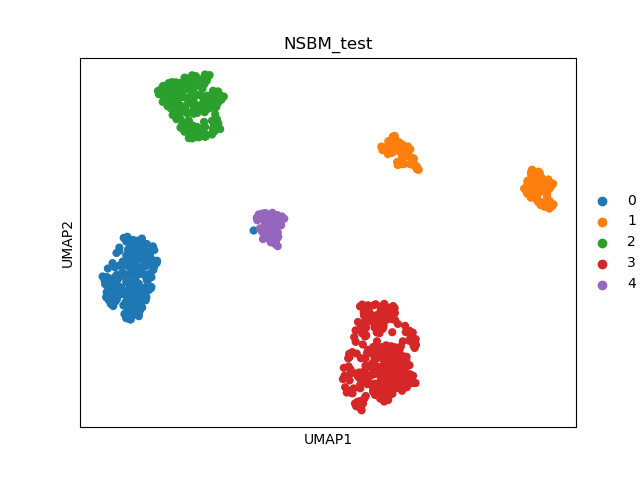

<IPython.core.display.Javascript object>


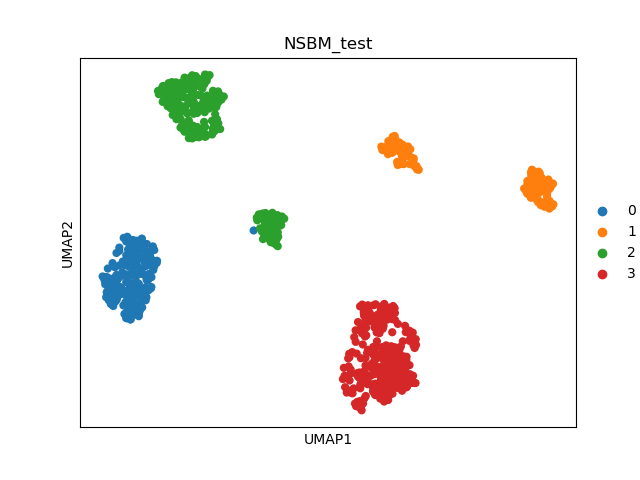

<IPython.core.display.Javascript object>


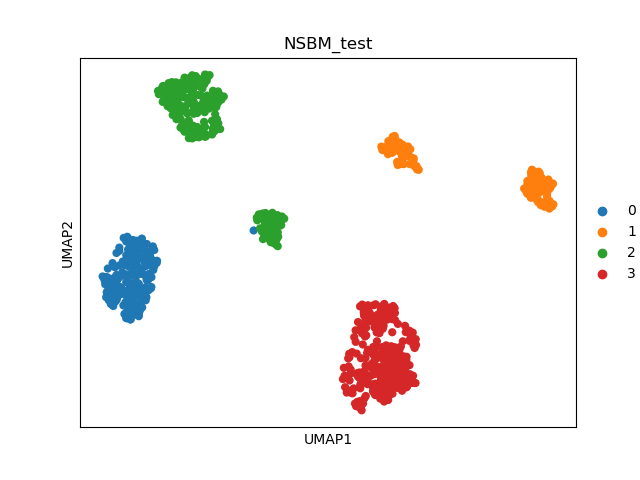

<IPython.core.display.Javascript object>


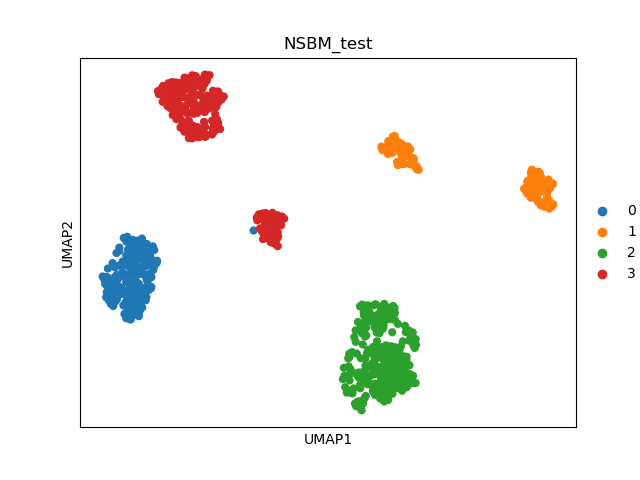

<IPython.core.display.Javascript object>


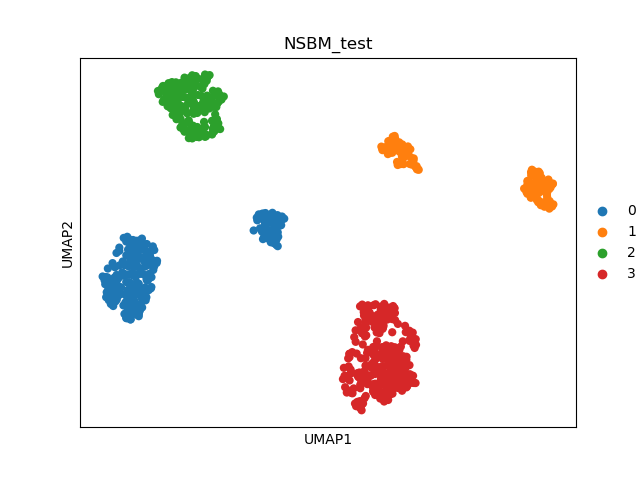

<IPython.core.display.Javascript object>


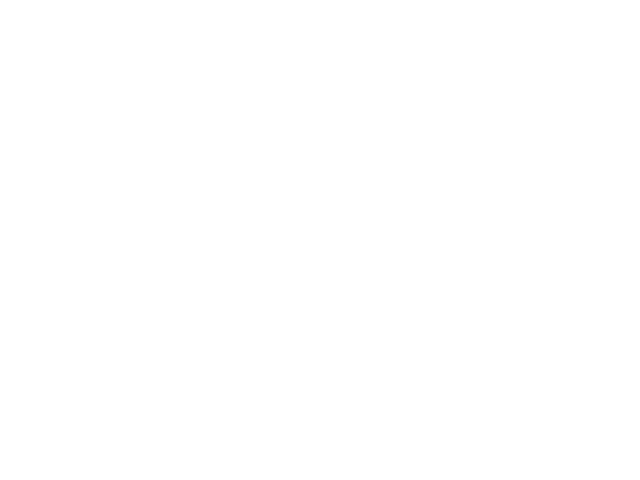

<IPython.core.display.Javascript object>


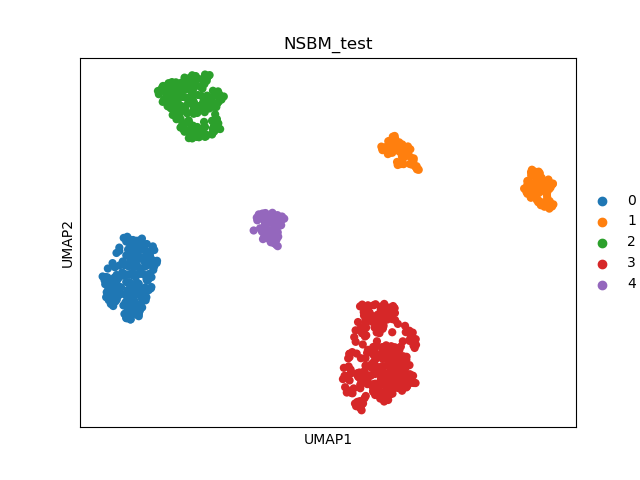

<IPython.core.display.Javascript object>


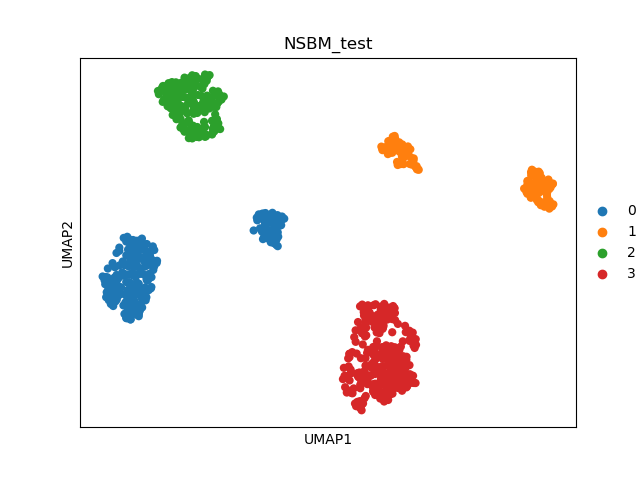

<IPython.core.display.Javascript object>


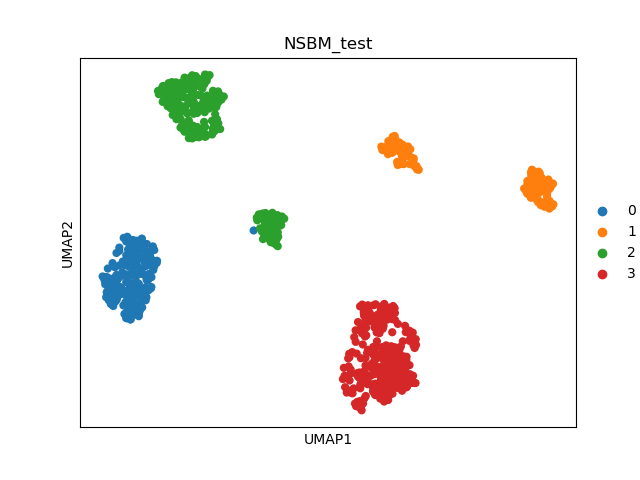

<IPython.core.display.Javascript object>


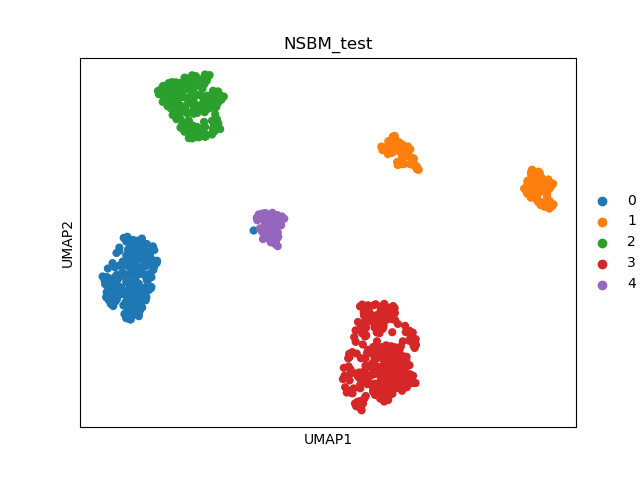

<IPython.core.display.Javascript object>


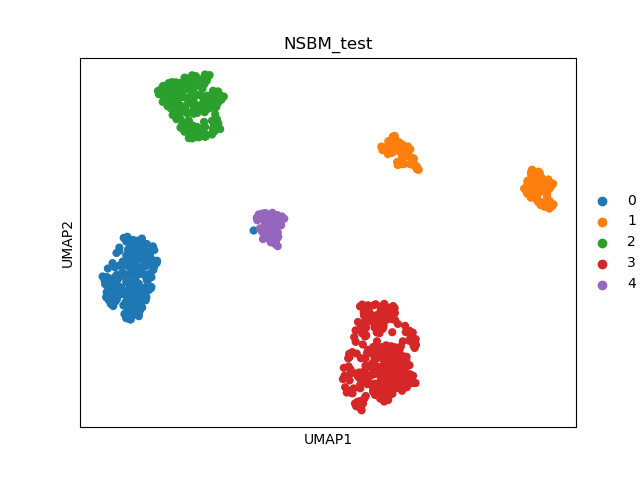

<IPython.core.display.Javascript object>


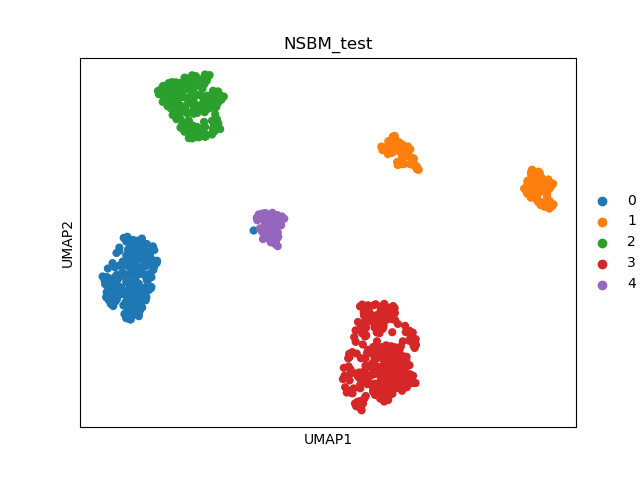

<IPython.core.display.Javascript object>


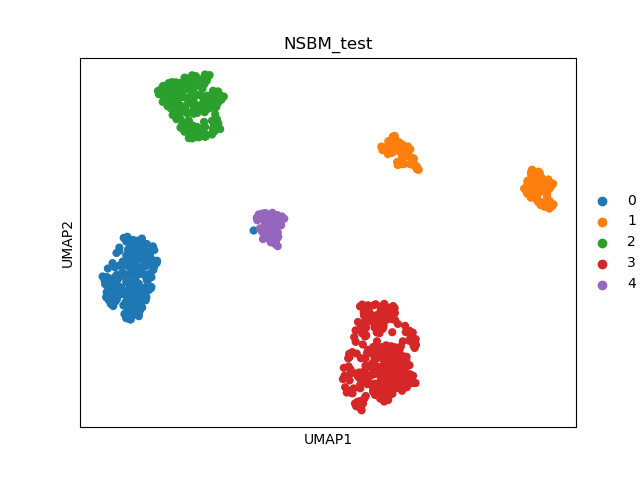

<IPython.core.display.Javascript object>


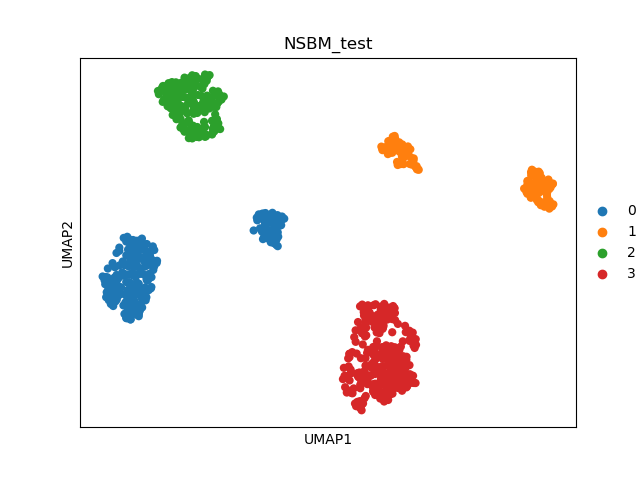

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<IPython.core.display.Javascript object>


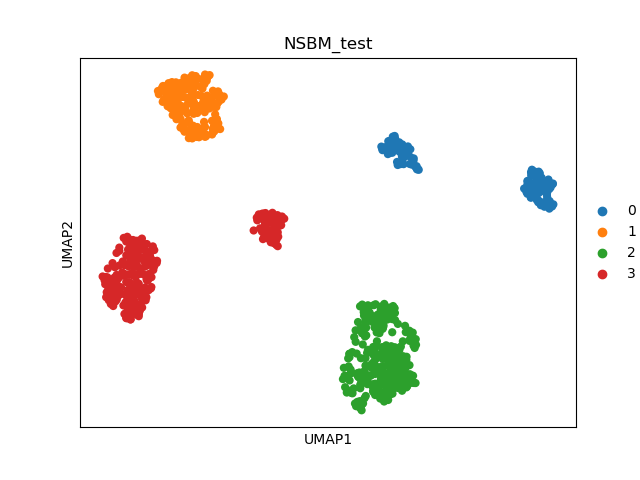

In [20]:
for i in range (len(states_100)):
    adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(states_100[i].project_level(2).get_blocks()))
    figure(i)
    sc.pl.umap(adata, color="NSBM_test")

In [22]:
for i in range (len(states_100)):
    adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(states_100[i].project_level(2).get_blocks()))
    print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4            61     0      0      0       0
cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0     0      0    295       0
3            61   176      7      0       0
cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            62     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127    

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2            61   176      7      0       0
3             0     0      0    295       0
cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4            61     0      0      0       0
cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4            61     0      0      0       0
cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4    

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0    127      0       0
1             0   176      7      0       0
2             0     0      0    295       0
3            62     0      4      1     188
cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2            61   176      7      0       0
3             0     0      0    295       0
cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4            61     0      0      0       0
cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            62     0      4      1     188
1             0     0    127    

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2            61   176      7      0       0
3             0     0      0    295       0
cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4            61     0      0      0       0
cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4            61     0      0      0       0
cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4    

In [25]:
adata_f = adata[adata.obs.cell_line != "H1975"]

<IPython.core.display.Javascript object>


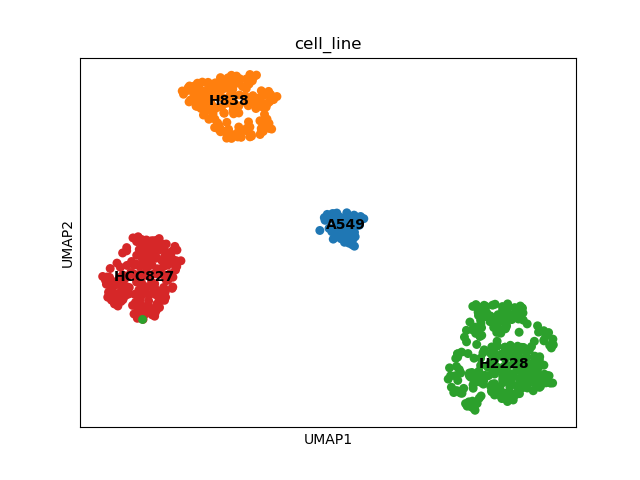

In [28]:
sc.pl.umap(adata_f, color="cell_line", legend_loc="on data")

In [29]:
g = gt.Graph(directed=False)

In [30]:
adj=adata_f.uns['neighbors']['connectivities']
edge_weights = g.new_edge_property('double')
g.edge_properties['weight'] = edge_weights
nnz = np.nonzero(np.triu(adj.todense(),1))
nedges = len(nnz[0])
g.add_edge_list(np.hstack([np.transpose(nnz),np.reshape(adj[nnz],(nedges,1))]),eprops=[edge_weights])

In [31]:
n_state = gt.minimize_nested_blockmodel_dl(g)

In [103]:
bs = n_state.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = n_state.copy(bs=bs, sampling=True)
dS, nattempts, nmoves = state.mcmc_sweep(niter=1000, deterministic=True)

#collect_num_groups
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]

def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1
gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

(16930.4359672565, 80120131, 31614615)

In [104]:
bl3 = [x.entropy() for x in state.get_levels()]

<IPython.core.display.Javascript object>


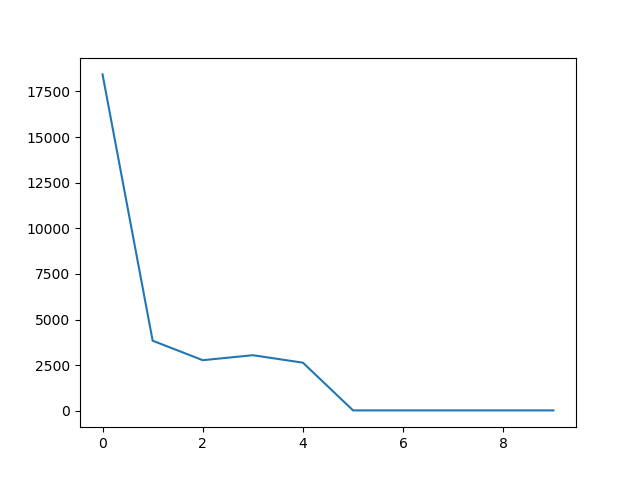

In [105]:
figure()
plot(range(len(bl3)), bl3)

In [106]:
state

<NestedBlockState object, with base <BlockState object with 47 blocks (45 nonempty), degree-corrected, for graph <Graph object, undirected, with 722 vertices and 5017 edges at 0x7f7234a33590>, at 0x7f71e46367d0>, and 10 levels of sizes [(722, 45), (45, 13), (13, 6), (6, 3), (3, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2)] at 0x7f71e46361d0>

In [77]:
adata_f.obs.loc[:, "level_4"] = pd.Categorical(list(state.project_level(4).get_blocks()))

In [101]:
adata_f.obs.loc[:, "level_3"] = pd.Categorical(list(state.project_level(3).get_blocks()))

<IPython.core.display.Javascript object>


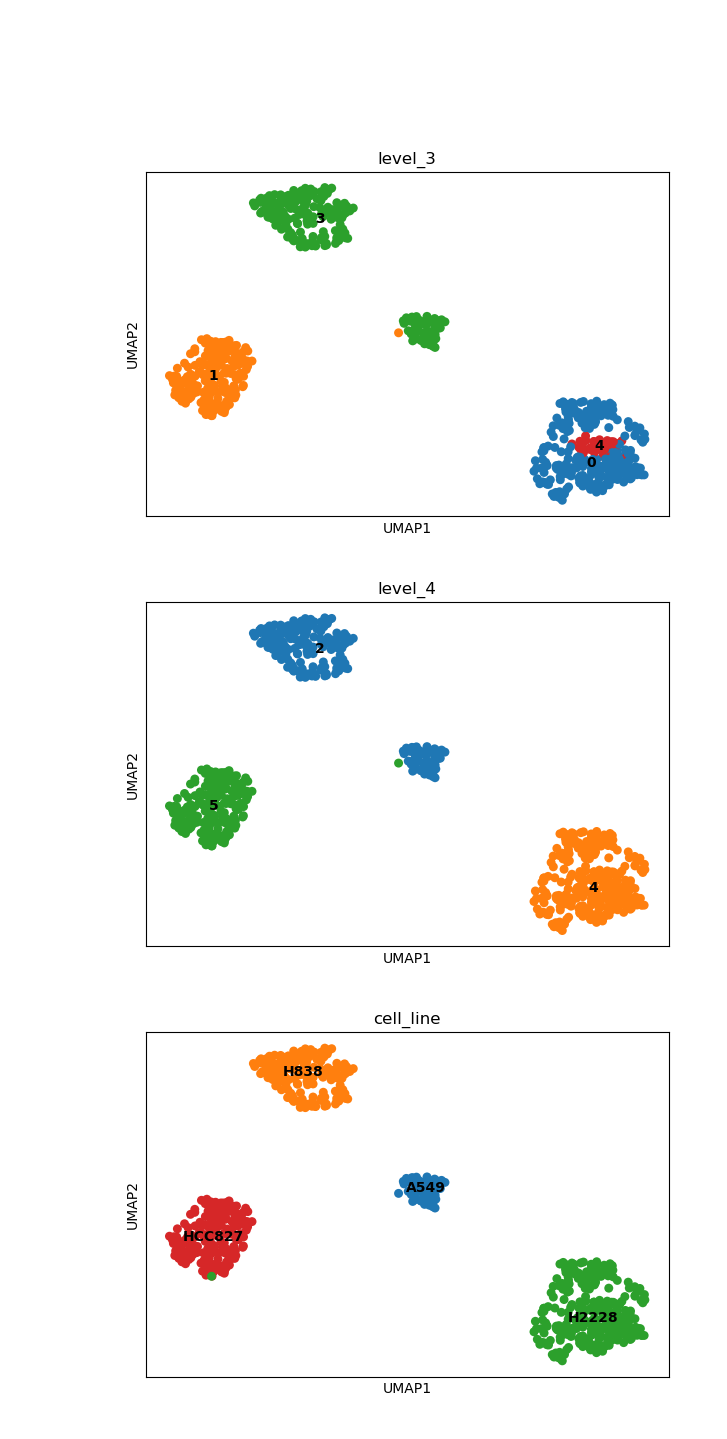

In [102]:
sc.pl.umap(adata_f, color=["level_3", "level_4", "cell_line"], ncols=1, legend_loc="on data")

In [90]:
bs = n_state.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = n_state.copy(bs=bs, sampling=True)
dS, nattempts, nmoves = state.mcmc_sweep(niter=1000)

AttributeError: 'NestedBlockState' object has no attribute 'gibbs_sweep'

In [ ]:
#collect_num_groups
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]

def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1
gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)